# Plug flow reactor simulation of Thruster

![caption](Graphics/thruster-details.png)


In [1]:
import cantera as ct
import numpy as np
import logging
from matplotlib import pyplot as plt
import csv
import os
import sys
import re
import itertools
import pandas as pd
from collections import defaultdict

#### Collision Rate Violators

In [2]:
import os, sys
rmg_path = os.getenv('RMGpy')
if rmg_path not in sys.path:
    sys.path.append(rmg_path)
sys.path

import rmgpy
from rmgpy.chemkin import load_chemkin_file
from rmgpy.rmgobject import RMGObject, expand_to_dict, recursive_make_object

print(f"RMG-Py Version {rmgpy.__version__}")
print(rmgpy.__file__)

RDKit WARNING: [09:33:51] Enabling RDKit 2019.09.3 jupyter extensions


RMG-Py Version 3.0.0
/home/nadeau.ma/Code/RMG-Py/rmgpy/__init__.py


In [3]:
chemkin_file = '../RMG-model/chemkin/chem_annotated-gas.inp'
chemkin_folder = os.path.split(chemkin_file)[0]
species_dictionary_file = os.path.join(chemkin_folder, 'species_dictionary.txt')
transport_file = os.path.join(chemkin_folder, 'tran.dat')

In [4]:
species, reactions = rmgpy.chemkin.load_chemkin_file(
                    chemkin_file, species_dictionary_file,transport_path=transport_file,
                    check_duplicates=False, use_chemkin_names=True,read_comments=True)

compare
[Species(label="Ne", molecule=[Molecule(smiles="[Ne]")], reactive=False, molecular_weight=(20.1797,'amu')), Species(label="NH3(2)", molecule=[Molecule(smiles="N")], molecular_weight=(17.0306,'amu')), Species(label="NH2OH(3)", molecule=[Molecule(smiles="NO")], molecular_weight=(33.03,'amu')), Species(label="HNO3(4)", molecule=[Molecule(smiles="[O-][N+](=O)O"), Molecule(smiles="[O-][N+](=O)O")], molecular_weight=(63.0129,'amu')), Species(label="CH3OH(5)", molecule=[Molecule(smiles="CO")], molecular_weight=(32.0419,'amu')), Species(label="H2O(6)", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu')), Species(label="N2(7)", molecule=[Molecule(smiles="N#N")], reactive=False, molecular_weight=(28.0135,'amu')), Species(label="O2(8)", molecule=[Molecule(smiles="[O][O]")], molecular_weight=(31.9988,'amu')), Species(label="NO2(9)", molecule=[Molecule(smiles="[O-][N+]=O"), Molecule(smiles="[O]N=O"), Molecule(smiles="[O]N=O"), Molecule(smiles="[O-][N+]=O")], molecular_weight=

{'Ne': Species(label="Ne", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,3.35532], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,3.35532], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'), comment="""Thermo library: primaryThermoLibrary"""), molecule=[Molecule(smiles="[Ne]")], reactive=False, molecular_weight=(20.1797,'amu')), 'X(1)': Species(label="X(1)", molecule=[Molecule(smiles="[Pt]")], molecular_weight=(0,'amu')), 'NH3(2)': Species(label="NH3(2)", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[4.09069,-0.00207163,1.14752e-05,-9.47496e-09,2.6122e-12,-6690.36,0.022256], Tmin=(100,'K'), Tmax=(993.33,'K')), NASAPolynomial(coeffs=[2.12302,0.00645658,-2.31618e-06,3.93869e-10,-2.58108e-14,-6329.29,9.35175], Tmin=(993.33,'K'), Tmax=(5000,'K'))], Tmin=(100,'K'), Tmax=(5000,'K'), comment="""Thermo library: primaryThermoLibrary"""), molecule=[Molecule(smiles="N")], molecular_weight=(17.0306,'amu')), 'NH2OH(3)': Speci

Products
S(1489)
....
reactants
HNO(87)
Products
NO(10)
....
reactants
HN2O(254)
Products
S(1489)
....
reactants
HN2O(254)
Products
S(1489)
....
reactants
HCO(22)
Products
CO(14)
....
reactants
CH3(18)
Products
CH4(15)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
H(20)
Products
H2(13)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
C2H5(21)
Products
C2H6(16)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
HCO(22)
Products
CH2O(17)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
OH(24)
Products
H2O(6)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
NH2OH(3)
Products
H2NO(88)
....
reactants
HN2O(254)
Products
S(1489)
....
reactants
HNOH(93)
Products
NH2OH(3)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
H2NO3(243)
Products
H3NO3(778)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
CH2OH(45)
Products
CH3OH(5)
....
reactants
S(1489)
Products
HN2O(254)
....
reactants
NO3(95)
Products
HNO3(4)
....
reactants
S(1489)
Products


O2(8)
Products
HO2(39)
....
reactants
C2H5O(76)
Products
C2H4O(65)
....
reactants
O2(8)
Products
HO2(39)
....
reactants
C2H5O(66)
Products
H(20)
....
reactants
C2H5O(66)
Products
C2H4O(65)
....
reactants
C2H5O(66)
Products
C2H4(25)
....
reactants
H(20)
Products
H2O(6)
....
reactants
C2H5O(66)
Products
CH2OH(45)
....
reactants
H(20)
Products
CH3(18)
....
reactants
C2H5O(66)
Products
C2H5(21)
....
reactants
H(20)
Products
OH(24)
....
reactants
H(20)
Products
C2H6O(75)
....
reactants
C2H5O(66)
Products
C2H6O(75)
....
reactants
C2H5O(66)
Products
CH2OH(45)
....
reactants
O(36)
Products
CH2O(17)
....
reactants
C2H5O(66)
Products
C2H4O(65)
....
reactants
OH(24)
Products
H2O(6)
....
reactants
C2H5O(66)
Products
C2H6O(75)
....
reactants
HO2(39)
Products
O2(8)
....
reactants
C2H5O(66)
Products
CH2OH(45)
....
reactants
HO2(39)
Products
OH(24)
....
reactants
HO2(39)
Products
CH2O(17)
....
reactants
O2(8)
Products
C2H5O3(77)
....
reactants
C2H5O(66)
Products
C2H5O3(77)
....
reactants
C2H5O(66)
Pro

NO(10)
Products
N2O(11)
....
reactants
NCO(103)
Products
CO2(12)
....
reactants
NO(10)
Products
N2(7)
....
reactants
NCO(103)
Products
CO(14)
....
reactants
NO2(9)
Products
NO(10)
....
reactants
NO2(9)
Products
NO(10)
....
reactants
NCO(103)
Products
CO2(12)
....
reactants
NO2(9)
Products
N2O(11)
....
reactants
NCO(103)
Products
HNCO(105)
....
reactants
HNO(87)
Products
NO(10)
....
reactants
NCO(103)
Products
HNCO(105)
....
reactants
HONO(92)
Products
NO2(9)
....
reactants
NCO(103)
Products
HNCO(105)
....
reactants
NH3(2)
Products
NH2(85)
....
reactants
NCO(103)
Products
CO(14)
....
reactants
N(90)
Products
N2(7)
....
reactants
NCO(103)
Products
CO(14)
....
reactants
NCO(103)
Products
N2(7)
....
reactants
NCO(103)
Products
CO(14)
....
reactants
CH3CN(111)
Products
H(20)
....
reactants
CH3CN(111)
Products
CH2CN(112)
....
reactants
CH3CN(111)
Products
HCN(100)
....
reactants
H(20)
Products
CH3(18)
....
reactants
CH3CN(111)
Products
HNC(102)
....
reactants
H(20)
Products
CH3(18)
....
reac

reactants
C2H3N(150)
Products
CHCNH(153)
....
reactants
OH(24)
Products
H2O(6)
....
reactants
C2H3N(150)
Products
CH2CN(112)
....
reactants
OH(24)
Products
H2O(6)
....
reactants
C2H3N(150)
Products
CH2CN(112)
....
reactants
CH3(18)
Products
CH4(15)
....
reactants
C2H3N(150)
Products
CH2CN(112)
....
reactants
NH2(85)
Products
NH3(2)
....
reactants
C2H3N(151)
Products
HCN(100)
....
reactants
H(20)
Products
CH3(18)
....
reactants
C2H3N(152)
Products
HCN(100)
....
reactants
H(20)
Products
CH3(18)
....
reactants
C2H3N(151)
Products
CH2O(17)
....
reactants
O(36)
Products
HCN(100)
....
reactants
C2H3N(151)
Products
HNCO(105)
....
reactants
O2(8)
Products
CH2O(17)
....
reactants
C2H3N(152)
Products
C2H3N(151)
....
reactants
C2H3N(152)
Products
C2H3N(151)
....
reactants
H(20)
Products
H(20)
....
reactants
C2H3N(152)
Products
C2H3N(154)
....
reactants
C2H3N(152)
Products
CH3CN(111)
....
reactants
C2H3N(152)
Products
HCO(22)
....
reactants
O(36)
Products
H(20)
....
reactants
O(36)
Products
HCN(10

In [5]:
species_dict = {rmgpy.chemkin.get_species_identifier(s): s for s in species}
# species_dict.keys()

In [6]:
def check_collision_limit_violation(self, t_min, t_max, p_min, p_max):
        """
        Warn if a core reaction violates the collision limit rate in either the forward or reverse direction
        at the relevant extreme T/P conditions. Assuming a monotonic behaviour of the kinetics.
        Returns a list with the reaction object and the direction in which the violation was detected.
        """
        conditions = [[t_min, p_min]]
        if t_min != t_max:
            conditions.append([t_max, p_min])
        if self.kinetics.is_pressure_dependent() and p_max != p_min:
            conditions.append([t_min, p_max])
            if t_min != t_max:
                conditions.append([t_max, p_max])
        logging.debug("Checking whether reaction {0} violates the collision rate limit...".format(self))
        violator_list = []
        kf_list = []
        kr_list = []
        collision_limit_f = []
        collision_limit_r = []
        for condition in conditions:
            if len(self.reactants) >= 2:
                try:
                    collision_limit_f.append(self.calculate_coll_limit(temp=condition[0], reverse=False))
                except ValueError:
                    continue
                else:
                    kf_list.append(self.get_rate_coefficient(condition[0], condition[1]))
            if len(self.products) >= 2:
                try:
                    collision_limit_r.append(self.calculate_coll_limit(temp=condition[0], reverse=True))
                except ValueError:
                    continue
                else:
                    kr_list.append(self.generate_reverse_rate_coefficient().get_rate_coefficient(condition[0], condition[1]))
        if len(self.reactants) >= 2:
            for i, k in enumerate(kf_list):
                if k > collision_limit_f[i]:
                    ratio = k / collision_limit_f[i]
                    condition = '{0} K, {1:.1f} bar'.format(conditions[i][0], conditions[i][1] / 1e5)
                    violator_list.append([self, 'forward', ratio, condition])
        if len(self.products) >= 2:
            for i, k in enumerate(kr_list):
                if k > collision_limit_r[i]:
                    ratio = k / collision_limit_r[i]
                    condition = '{0} K, {1:.1f} bar'.format(conditions[i][0], conditions[i][1] / 1e5)
                    violator_list.append([self, 'reverse', ratio, condition])
        return violator_list

In [7]:
violators = []
for r in reactions:
    try:
        v = check_collision_limit_violation(r, 150+273,1000, 1e5, 30e5)
    except np.linalg.LinAlgError:
        print(f"LinAlgError checking {r}")
    if v:
        print(r)
        violators.extend(v)

NO(10) + NO(10) <=> N2O2(390)
NO2(9) + CH2OH(45) <=> S(1216)
NO2(9) + NO2(9) <=> NO(10) + NO3(95)
H2NO(88) + CH2OH(45) <=> S(1108)
NO(10) + CH2OH(45) <=> S(1494)
NO(10) + NH2(85) <=> S(1489)
NO(10) + HCO(22) <=> CHNO2(397)
H2NO(88) + CH3(18) <=> NH2(85) + CH3O(46)
HNOH(93) + CH2OH(45) <=> ONCO(1021)
H2NO(88) + C2H5(21) <=> H3NO(634) + C2H4(25)
H2NO(88) + H2NO(88) <=> HNO(87) + H3NO(634)
H2NO(88) + HNOH(93) <=> HNO(87) + H3NO(634)
H2NO(88) + H2NO3(243) <=> HNO3(4) + H3NO(634)
H2NO(88) + CH2OH(45) <=> H3NO(634) + CH2O(17)
HN2O(254) + H2NO(88) <=> N2O(11) + H3NO(634)
H2NO(88) + CH3O(46) <=> H3NO(634) + CH2O(17)
H2NO(88) + HCO(22) <=> S(674)
HNOH(93) + HCO(22) <=> ONCDO(266)
HNO(630) + HCO(22) <=> S(665)
H2NO(88) + S(665) <=> H3NO(634) + CHNO2(397)
H2NO3(243) + S(665) <=> HNO3(4) + S(674)
HN2O(254) + S(665) <=> N2O(11) + S(674)
HCO(22) + S(665) <=> CO(14) + S(674)
S(665) + CH2OH(45) <=> CH2O(17) + S(674)
S(665) + CH3O(46) <=> CH2O(17) + S(674)
S(665) + C2H5(21) <=> S(674) + C2H4(25)
HNOH(9

In [8]:
from rmgpy.data.kinetics import TemplateReaction, LibraryReaction
from rmgpy.rmg.pdep import PDepReaction

In [9]:
violators.sort(key = lambda violator: -violator[2])

Text(0.5, 0, 'reaction index (of 1791 total)')

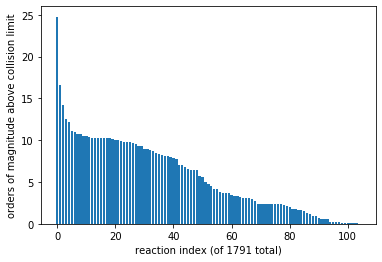

In [10]:
ratios = [np.log10(violator[2]) for violator in violators]
from matplotlib import pyplot as plt
plt.bar(np.arange(len(ratios)), ratios)
plt.ylabel("orders of magnitude above collision limit")
plt.xlabel(f"reaction index (of {len(reactions)} total)")

In [11]:
print(f"{' Rxn#':1s}  {'Reaction':57s}  {'Ratio' :5s}")
for violator in violators[:10]:
    rxn_string = str(violator[0])
    index = violator[0].index
    direction = {'forward':'=>','reverse':'<='}[violator[1]]
    ratio = violator[2]
    print(f"{index:5d}  {rxn_string.replace('<=>',direction) :57s}  {ratio :.1g}  {direction} {violator[-1]}")

 Rxn#  Reaction                                                   Ratio
 1132  CH2O(17) + C2H5O3(77) => HCO(22) + CH2OH(45) + CH2OOH(55)  6e+24  <= 423 K, 1.0 bar
  503  H2NO3(243) + S(665) <= HNO3(4) + S(674)                    4e+16  <= 1000 K, 1.0 bar
  503  H2NO3(243) + S(665) <= HNO3(4) + S(674)                    2e+14  <= 423 K, 1.0 bar
  578  H2NO(88) + S(665) <= HNO(87) + S(7627)                     4e+12  <= 1000 K, 1.0 bar
 1131  HO2(39) + C2H5O3(77) => O2(8) + CH2OH(45) + CH2OOH(55)     1e+12  <= 423 K, 1.0 bar
 1408  H2(13) + NCN(108) <= H(20) + HNCN(107)                     1e+11  <= 423 K, 1.0 bar
 1736  CH3NO(142) <= H(20) + H2NCO(146)                           1e+11  <= 423 K, 30.0 bar
  509  S(665) + CH2OH(45) <= CH2O(17) + S(674)                    6e+10  <= 1000 K, 1.0 bar
  584  S(665) + S(665) <= CHNO2(397) + S(7627)                    6e+10  <= 1000 K, 1.0 bar
  578  H2NO(88) + S(665) <= HNO(87) + S(7627)                     4e+10  <= 423 K, 1.0 bar


#### Rocketman

In [12]:
# default if not using SLURM array
cat_area_per_vol = 3e6 # m2/m3
temperature_c = 700 # ºC
rtol = 1e-11
atol = 1e-24
residual_threshold = 5e-3

# input file containing the reaction mechanism
cti_file = '../RMG-model/cantera/chem_annotated.cti'
#cti_file = '../RMG-model/cantera/chem0050.cti'

In [13]:
cat_area_per_vol_options = [3e2, 3e3, 3e4, 3e5, 6e5, 9e5, 1.2e6, 3e6, 3e7, 3e8] # m2/m3
temperature_c_options = [200, 300, 400, 500, 600] # ºC

cat_area_per_vol_options = [3e3, 3e4, 3e5, 3e6, 3e7, 3e8] # m2/m3
temperature_c_options = [200, 300, 400, 500] # ºC
rtol_options = [1e-6, 1e-9, 1e-11]
atol_options = [1e-15, 1e-18, 1e-21, 1e-24]

settings  = list(itertools.product(cat_area_per_vol_options,
                                   temperature_c_options,
                                   rtol_options,
                                   atol_options
                                  ))
print(f"Settings array is from 0 to {len(settings)-1} ")

Settings array is from 0 to 287 


In [14]:
with open('rocketman_array.sh') as f:
    for l in f:
        m = re.match('#SBATCH --array=(\d+)-(\d+)', l)
        if m:
            print(l)
            start = int(m.group(1))
            end = int(m.group(2))
assert (start, end) == (0, len(settings)-1 ), "SLURM array doesn't match settings array"

#SBATCH --array=0-287%100



In [15]:
print(f"Catalyst area per volume {cat_area_per_vol :.2e} m2/m3")
print(f"Initial temperature      {temperature_c :.1f} ºC")
print(f"Solver RTOL              {rtol :.1e}")
print(f"Solvel ATOL              {atol :.1e}")

Catalyst area per volume 3.00e+06 m2/m3
Initial temperature      700.0 ºC
Solver RTOL              1.0e-11
Solvel ATOL              1.0e-24


In [16]:
gas=ct.Solution(cti_file)
surf = ct.Interface(cti_file,'surface1', [gas])

In [17]:
gas()


  gas:

       temperature             300  K
          pressure          101325  Pa
           density         0.81974  kg/m^3
  mean mol. weight         20.1797  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy          1905.6        3.845e+04     J
   internal energy      -1.217e+05       -2.456e+06     J
           entropy          7257.7        1.465e+05     J/K
    Gibbs function     -2.1754e+06        -4.39e+07     J
 heat capacity c_p          1030.1        2.079e+04     J/K
 heat capacity c_v          618.03        1.247e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                Ne              1                1         -17.5994
     [ +186 minor]              0                0



In [18]:
print(", ".join(gas.species_names))

Ne, NH3(2), NH2OH(3), HNO3(4), CH3OH(5), H2O(6), N2(7), O2(8), NO2(9), NO(10), N2O(11), CO2(12), H2(13), CO(14), CH4(15), C2H6(16), CH2O(17), CH3(18), C3H8(19), H(20), C2H5(21), HCO(22), CH3CHO(23), OH(24), C2H4(25), O(36), Ar(37), HO2(39), H2O2(40), HOCO(41), CH2(42), CH2(S)(43), CH(44), CH2OH(45), CH3O(46), HCOH(47), CH3OO(48), CH2CO(49), C2H3(50), C(51), C2H2(52), C2H(53), CH3OOH(54), CH2OOH(55), HOCH2O(56), HOCHO(57), C2H5O(58), C2H5O2(59), C2H5O2(60), cC2H4O(61), CH2CHO(62), H2CC(63), CH3CO(64), C2H4O(65), C2H5O(66), C2H3O2(67), CHCHO(68), OCHCHO(69), HCCO(70), HCCOH(71), CHCHOH(72), C2(73), C2O(74), C2H6O(75), C2H5O(76), C2H5O3(77), cC2H3O(78), C2H3O3(79), OCHCO(80), C2H6O2(81), C2H5O2(82), C2H4O2(83), OCHO(84), NH2(85), NH(86), HNO(87), H2NO(88), HON(89), N(90), NNH(91), HONO(92), HNOH(93), HNO2(94), NO3(95), N2H2(96), H2N2(97), N2H3(98), N2H4(99), HCN(100), CN(101), HNC(102), NCO(103), HOCN(104), HNCO(105), NCCN(106), HNCN(107), NCN(108), HNCNH(109), HCNO(110), CH3CN(111), CH2C

In [19]:
print(", ".join(surf.species_names))

X(1), HX(26), OX(27), CH3X(28), HOX(29), H2OX(30), CO2X(31), OCX(32), CX(33), CH2X(34), CHX(35), H2NX(201), H3NX(202), H2NOX(203), H2NOX(204), H3NOX(205), NO2X(206), NO3X(207), HNO3X(208), CH3OX(209), CH3OX(210), CH4OX(211), OX(213), NOX(215), NO2X(216), NOJX(217), H2X(219), SX(494), SX(495), CHO2X(506), HNO2X(513), HNX(532), HNOX(533), NX(604), SX(605), SX(606), SX(609), H2N2X(614), N2O3X(618), SX(623), HNOX(631), H2NOX(633), HNO2X(741), SX(759), HONOX(934), SX(1000), SX(1039), SX(1043), SX(1047), SX(1048), SX(1050), SX(1063), SX(1064), HNOX(1071), SX(1163), SX(1249), N2OX(1419), CNOX(1438), SX(1527), SX(1895), SX(2232), SX(2233), SX(2465), SX(3049), SX(3050), SX(3248), SX(3939), SX(4539), SX(4540), NO3X(4718), SX(4793), SX(4794), SX(4937), SX(5513), SX(5810), SX(5814), SX(6977), SX(7604), SX(9643)




This example solves a plug flow reactor problem, with coupled surface and gas chemistry.





In [20]:
# unit conversion factors to SI
cm = 0.01 # m
minute = 60.0  # s

In [21]:
#######################################################################
# Input Parameters for combustor
#######################################################################
mass_flow_rate =  0.5e-3 # kg/s
#temperature_c = 550.0  # Initial Temperature in Celsius
print(f"Initial temperature {temperature_c :.1f} ºC")
pressure = ct.one_atm # constant

length = 1.1 * cm  # Catalyst bed length. 11mm
cross_section_area = np.pi * (0.9*cm)**2  # Catalyst bed area.  18mm diameter circle.

### Catalyst properties. Some are hard to estimate
# if we can, update this lit value or verify the value richard calculated
porosity = 0.38  # Catalyst bed porosity (0.38)
# Al2O3 particles are about 0.7mm diameter
cat_specific_area = 140 # m2/g
print(f"Catalyst specific area {cat_specific_area :.2e} m2/g")
cat_density = 2 / cm**3 # 2 g/m3
print(f"Catalyst density {cat_density :.2e} g/m3")
cat_area_per_reactor_vol = cat_specific_area * cat_density # m2/m3
print(f"Catalyst area per total reactor volume {cat_area_per_reactor_vol :.2e} m/m3")
cat_area_per_gas_vol = cat_area_per_reactor_vol / porosity # porosity is gas vol per reactor vol
print(f"Catalyst area per gas volume {cat_area_per_gas_vol :.2e} m/m3")

#cat_area_per_vol =  cat_area_per_gas_vol * 1e-3 # REDUCE BY A LOT
print(f"\nCatalyst area per volume in use for this simulation: {cat_area_per_vol :.2e} m2/m3")



Initial temperature 700.0 ºC
Catalyst specific area 1.40e+02 m2/g
Catalyst density 2.00e+06 g/m3
Catalyst area per total reactor volume 2.80e+08 m/m3
Catalyst area per gas volume 7.37e+08 m/m3

Catalyst area per volume in use for this simulation: 3.00e+06 m2/m3


In [22]:
output_filename = 'surf_pfr_output_mlou_test.csv'

# The PFR will be simulated by a chain of 'NReactors' stirred reactors.
NReactors = 2201

#####################################################################

temperature_kelvin = temperature_c + 273.15  # convert to Kelvin

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')

# From HAN-molefractions.ipynb
feed_mole_fractions = {
    'NH3(2)': 0.031,
    'NH2OH(3)': 0.32,
    'HNO3(4)': 0.35,
    'CH3OH(5)': 0.21,
    'H2O(6)': 0.09,
}
gas.TPX = temperature_kelvin, pressure, feed_mole_fractions


# import the surface model
surf = ct.Interface(cti_file,'surface1', [gas])
surf.TP = temperature_kelvin, pressure
surf.coverages = 'X(1):1.0'

r_len = length/(NReactors-1) 
r_vol = cross_section_area * r_len * porosity # gas volume

# catalyst area in one reactor
cat_area = cat_area_per_vol * r_vol

# Not sure we need the velocity
velocity = mass_flow_rate / (gas.density * cross_section_area)

In [23]:
def report_rates(n=8):
    print("\nHighest net rates of progress, gas")
    for i in np.argsort(abs(gas.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.net_rates_of_progress[i]:8.1g}")
    print("\nHighest net rates of progress, surface")
    for i in np.argsort(abs(surf.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.net_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, gas")
    for i in np.argsort(abs(gas.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, surface")
    for i in np.argsort(abs(surf.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, gas")
    for i in np.argsort(abs(gas.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, surface")
    for i in np.argsort(abs(surf.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.reverse_rates_of_progress[i]:8.1g}")

    print(f"\nSurface rates have been scaled by surface/volume ratio {cat_area_per_vol:.1e} m2/m3")
    print("So are on a similar basis of volume of gas")
    print(" kmol / m3 / s")
# report_rates()

In [24]:
def report_rate_constants(n=8):
    print("\nHighest forward rate constants, gas")
    for i in np.argsort(abs(gas.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rate_constants[i]:8.1e}")
    print("\nHighest forward rate constants, surface")
    for i in np.argsort(abs(surf.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.forward_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, gas")
    for i in np.argsort(abs(gas.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, surface")
    for i in np.argsort(abs(surf.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.reverse_rate_constants[i]:8.1e}")

    print("Units are a combination of kmol, m^3 and s, that depend on the rate expression for the reaction.")
# report_rate_constants()

In [57]:
print(violators[0][0].index)
print(violators[0][0])
checking_index = 1132

gas.reactions()[checking_index+1], 

1132
CH2O(17) + C2H5O3(77) => HCO(22) + CH2OH(45) + CH2OOH(55)


(<ElementaryReaction: C2H5O3(77) + CH2O(17) => CH2OH(45) + CH2OOH(55) + HCO(22)>,)

In [25]:
def remove_violations(index):
    '''
    Reduce reaction rates so there are no collision violations
    for now ignoring rxns with 3 products as they may not be violators 
    **the ratio is calculated at extremes so this is probably overkill**
    '''
    i = index + 1 
    if len(gas.reactions()[i].products) <= 2:
        multiplier = ratio**(-1)
        gas.set_multiplier(multiplier,i)

In [99]:
def remove_collision_limit_violation(rxn,T,P):
        """
        Warn if a core reaction violates the collision limit rate in either the forward or reverse direction
        at the relevant extreme T/P conditions. Assuming a monotonic behaviour of the kinetics.
        Returns a list with the reaction object and the direction in which the violation was detected.
        """
        num = int(''.join(i for i in rxn.ID if i.isdigit())) 
        print(num)
        self = reactions[num]
        print(self)
        conditions = [[T,P]]
        logging.debug("Checking whether reaction {0} violates the collision rate limit...".format(self))
        violator_list = []
        kf_list = []
        kr_list = []
        collision_limit_f = []
        collision_limit_r = []
        for condition in conditions:
            if len(self.reactants) >= 2:
                try:
                    collision_limit_f.append(self.calculate_coll_limit(temp=condition[0], reverse=False))
                except ValueError:
                    continue
                else:
                    kf_list.append(self.get_rate_coefficient(condition[0], condition[1]))
            if len(self.products) >= 2:
                try:
                    collision_limit_r.append(self.calculate_coll_limit(temp=condition[0], reverse=True))
                except ValueError:
                    continue
                else:
                    kr_list.append(self.generate_reverse_rate_coefficient().get_rate_coefficient(condition[0], condition[1]))
        if len(self.reactants) >= 2:
            for i, k in enumerate(kf_list):
                if k > collision_limit_f[i]:
                    ratio = k / collision_limit_f[i]
                    condition = '{0} K, {1:.1f} bar'.format(conditions[i][0], conditions[i][1] / 1e5)
                    violator_list.append([self, 'forward', ratio, condition])
                    print(self.index)
#                     gas.set_multiplier(ratio**(-1),self.index)
        if len(self.products) >= 2:
            for i, k in enumerate(kr_list):
                if k > collision_limit_r[i]:
                    ratio = k / collision_limit_r[i]
                    condition = '{0} K, {1:.1f} bar'.format(conditions[i][0], conditions[i][1] / 1e5)
                    violator_list.append([self, 'reverse', ratio, condition])
        return violator_list

In [108]:
print('looking at rxn 1132')
check_collision_limit_violation(gas.reactions()[1133],400,1e5)
print('\n',gas.reactions()[1133].ID)
gas.reactions()[1133]

looking at rxn 1132
1134
HO2(39) + NH3(2) <=> H2O2(40) + NH2(85)

 gas-1134


<ElementaryReaction: C2H5O3(77) + CH2O(17) => CH2OH(45) + CH2OOH(55) + HCO(22)>

In [59]:
def fix_rates(phase, limit):
    """
    Fix reverse reaction rates that are too fast.
    """
    for i in np.argsort(abs(phase.reverse_rate_constants))[-1:0:-1]:
        if phase.reverse_rate_constants[i] < limit:
            break
        print(f"Before: {i:3d} : {phase.reaction_equation(i):48s}  {phase.reverse_rate_constants[i]:8.1e}")
        multiplier = limit / phase.reverse_rate_constants[i]
        phase.set_multiplier(multiplier, i)
        print(f"After:  {i:3d} : {phase.reaction_equation(i):48s}  {phase.reverse_rate_constants[i]:8.1e}")
        
# fix_rates(gas, 1e18)
#fix_rates(surf, 1e21)

In [27]:
np.argsort?

In [28]:
def save_flux_diagrams(*phases, suffix=''):
    """
    Saves the flux diagrams. The filenames have a suffix if provided,
    so you can keep them separate and not over-write.
    """
    for element in 'CHONX':
        for phase_object in phases:
            phase = phase_object.name

            diagram = ct.ReactionPathDiagram(phase_object, element)
            diagram.title = f'Reaction path diagram following {element} in {phase}'
            diagram.label_threshold = 0.01

            dot_file = f"reaction_path_{element}_{phase}{'_' if suffix else ''}{suffix}.dot"
            img_file = f"reaction_path_{element}_{phase}{'_' if suffix else ''}{suffix}.png"
            img_path = os.path.join(os.getcwd(), img_file)
            diagram.write_dot(dot_file)
            #print(diagram.get_data())

            print(f"Wrote graphviz input file to '{os.path.join(os.getcwd(), dot_file)}'.")
            os.system(f'dot {dot_file} -Tpng -o{img_file} -Gdpi=200')
            print(f"Wrote graphviz output file to '{img_path}'.")

def show_flux_diagrams(*phases, suffix='', embed=False):
    """
    Shows the flux diagrams in the notebook.
    Loads them from disk.
    Does not embed them, to keep the .ipynb file small,
    unless embed=True. Use embed=True if you might over-write the files,
    eg. you want to show flux at different points.
    """
    import IPython
    for element in 'CHONX':
        for phase_object in phases:
            phase = phase_object.name
            img_file = f"reaction_path_{element}_{phase}{'_' if suffix else ''}{suffix}.png"
            display(IPython.display.HTML(f'<hr><h2>{element} {phase}</h2>'))
            if embed:
                display(IPython.display.Image(filename=img_file,width=400,embed=True))
            else:
                display(IPython.display.Image(url=img_file,width=400,embed=False))


def integrated_flux_diagrams():
    """This is a code fragment. Not working. Do not use it."""
    for element in 'CHON':
        diagrams = [ct.ReactionPathDiagram(surf, element), ct.ReactionPathDiagram(gas, element)]
        for diagram in diagrams:
            data = diagram.get_data()
            split_data = data.split("\n")
            for line in split_data[2:]:
                if len(line.split()) == 0: # skip empty line
                    continue
                s1, s2, fwd, rev = line.split()
                net = float(fwd) - float(rev)
                if net == 0.0:
                    continue
                flux_pair = (s1, s2)
                integration_flux_data[flux_pair] += net
    

In [29]:
gas.TPX = temperature_kelvin, pressure, feed_mole_fractions
surf.coverages = 'X(1):1.0'
#surf.coverages = starting_coverages

In [30]:
fix_rates(gas, 1e18)

Before: 471 : H2NO(88) + HCO(22) <=> S(674)                      1.9e+32
After:  471 : H2NO(88) + HCO(22) <=> S(674)                      1.0e+18
Before: 502 : H2NO3(243) + S(665) <=> HNO3(4) + S(674)           1.2e+28
After:  502 : H2NO3(243) + S(665) <=> HNO3(4) + S(674)           1.0e+18
Before: 295 : CH2OH(45) + H2NO(88) <=> S(1108)                   1.8e+25
After:  295 : CH2OH(45) + H2NO(88) <=> S(1108)                   1.0e+18
Before: 501 : H(20) + S(665) <=> S(674)                          1.1e+24
After:  501 : H(20) + S(665) <=> S(674)                          1.0e+18
Before: 577 : H2NO(88) + S(665) <=> HNO(87) + S(7627)            9.2e+23
After:  577 : H2NO(88) + S(665) <=> HNO(87) + S(7627)            1.0e+18
Before: 583 : 2 S(665) <=> CHNO2(397) + S(7627)                  2.2e+22
After:  583 : 2 S(665) <=> CHNO2(397) + S(7627)                  1.0e+18
Before: 508 : CH2OH(45) + S(665) <=> CH2O(17) + S(674)           2.0e+22
After:  508 : CH2OH(45) + S(665) <=> CH2O(17) + S(6

    distance(mm)     T (C)    NH3(2)   NH2OH(3)     HNO3(4)    CH3OH(5)  alpha
      0.000000    699.7    0.030932    0.317702    0.348111   0.209358  0.0e+00
      0.050000    699.7    0.030932    0.317702    0.348110   0.209358  0.0e+00
      0.100000    699.7    0.030932    0.317702    0.348110   0.209358  0.0e+00
      0.150000    699.7    0.030932    0.317702    0.348110   0.209358  0.0e+00
      0.200000    699.7    0.030932    0.317702    0.348110   0.209358  0.0e+00
      0.250000    699.7    0.030932    0.317702    0.348110   0.209358  0.0e+00
      0.300000    699.7    0.030932    0.317702    0.348110   0.209357  0.0e+00
      0.350000    699.7    0.030932    0.317701    0.348110   0.209357  0.0e+00
      0.400000    699.7    0.030932    0.317701    0.348109   0.209357  0.0e+00
      0.450000    699.7    0.030932    0.317700    0.348109   0.209357  0.0e+00
      0.500000    699.7    0.030932    0.317700    0.348108   0.209357  0.0e+00
      0.550000    699.7    0.030932    0.

Wrote graphviz output file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_C_gas_1mm.png'.
Wrote graphviz input file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_C_surface1_1mm.dot'.
Wrote graphviz output file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_C_surface1_1mm.png'.
Wrote graphviz input file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_H_gas_1mm.dot'.
Wrote graphviz output file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_H_gas_1mm.png'.
Wrote graphviz input file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_H_surface1_1mm.dot'.
Wrote graphviz output file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_H_surface1_1mm.png'.
Wrote graphviz input file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_O_gas_1mm.dot'.
Wrote graphviz output file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_O_gas_1mm.png'.
Wrote graphviz input file to '/home/nadeau.ma/Code/HAN/CanteraModels/reaction_path_O

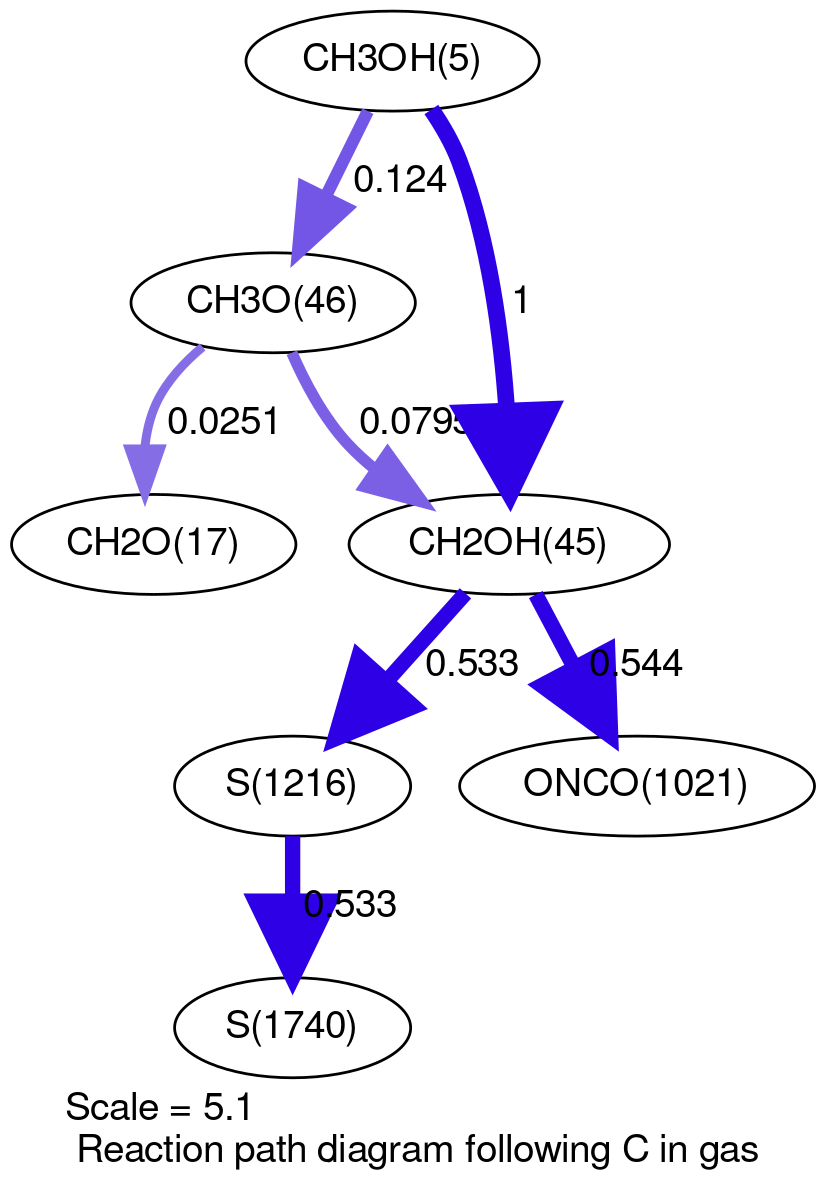

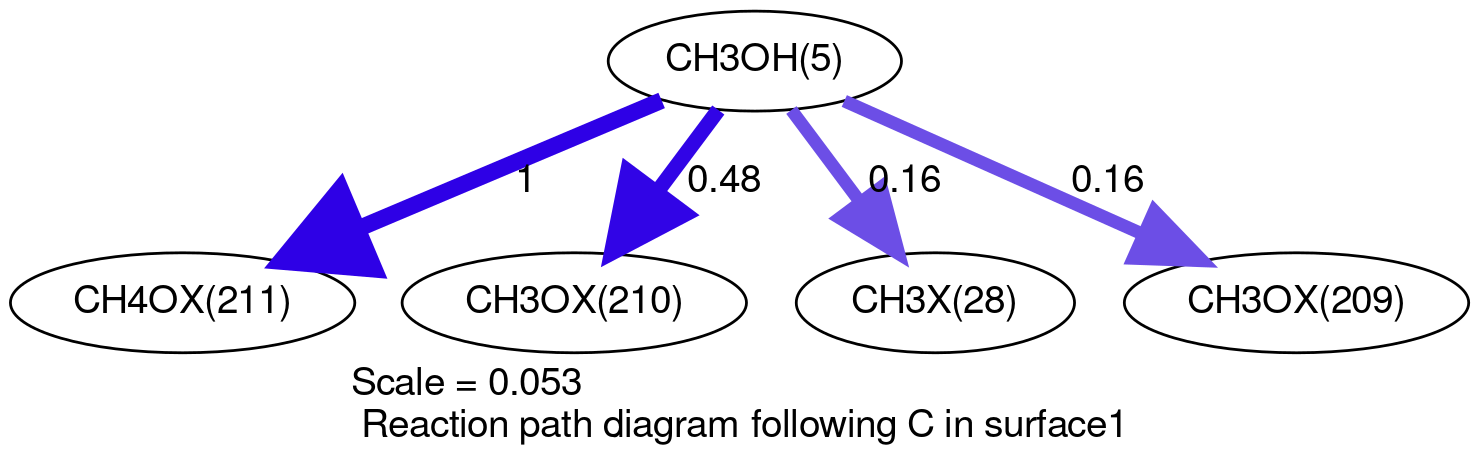

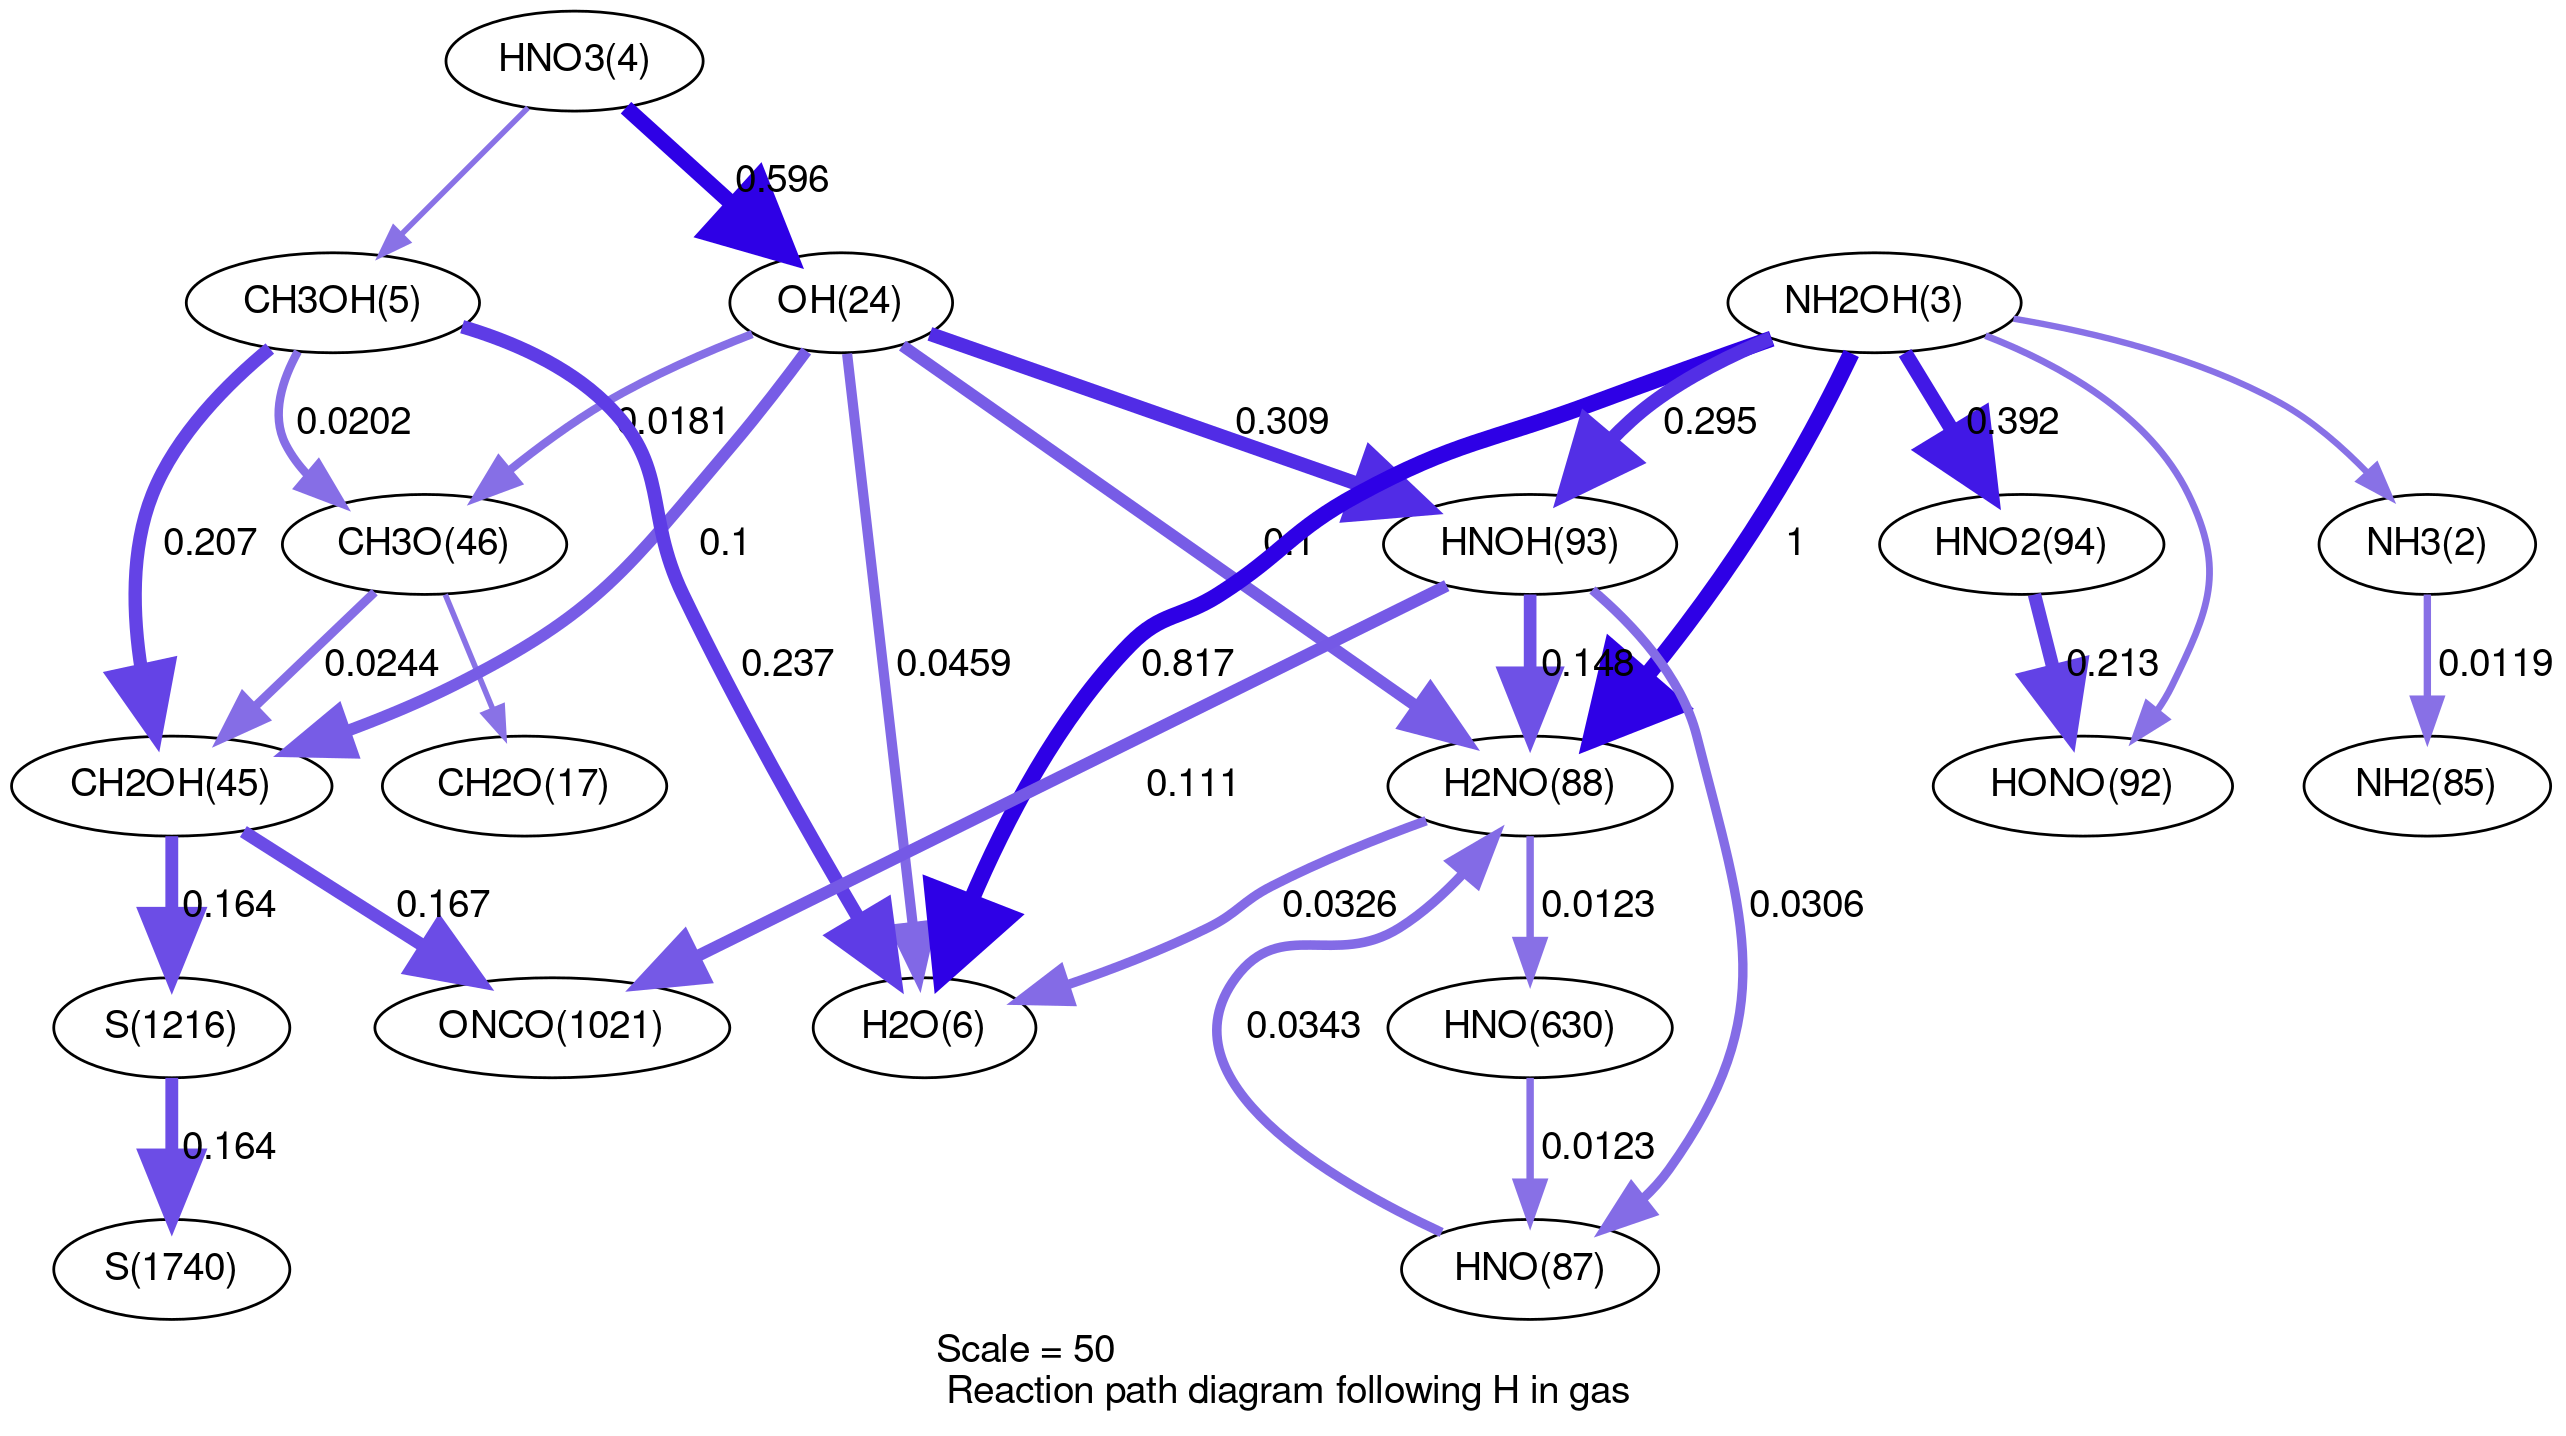

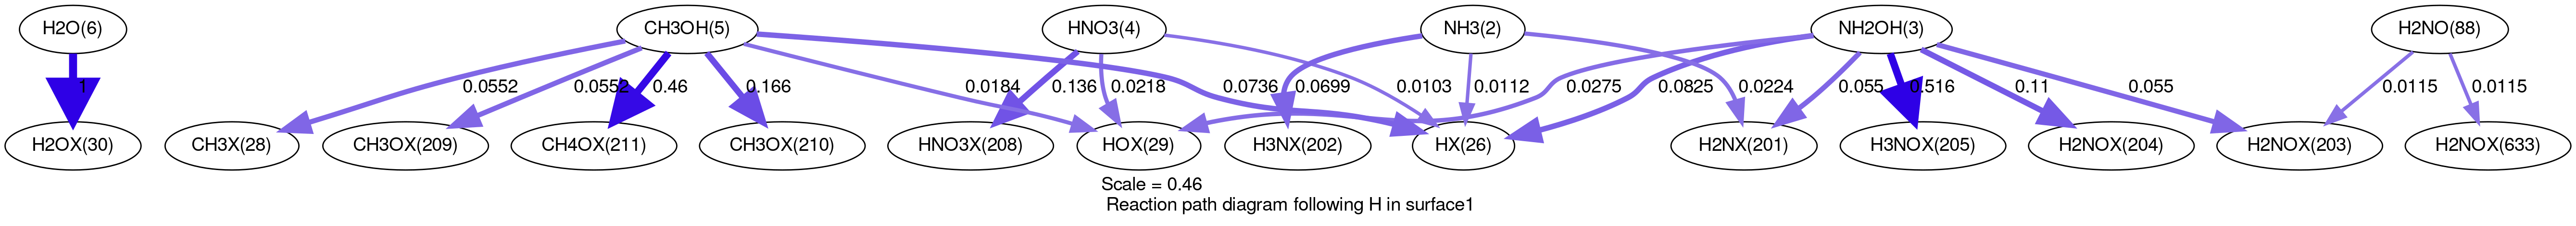

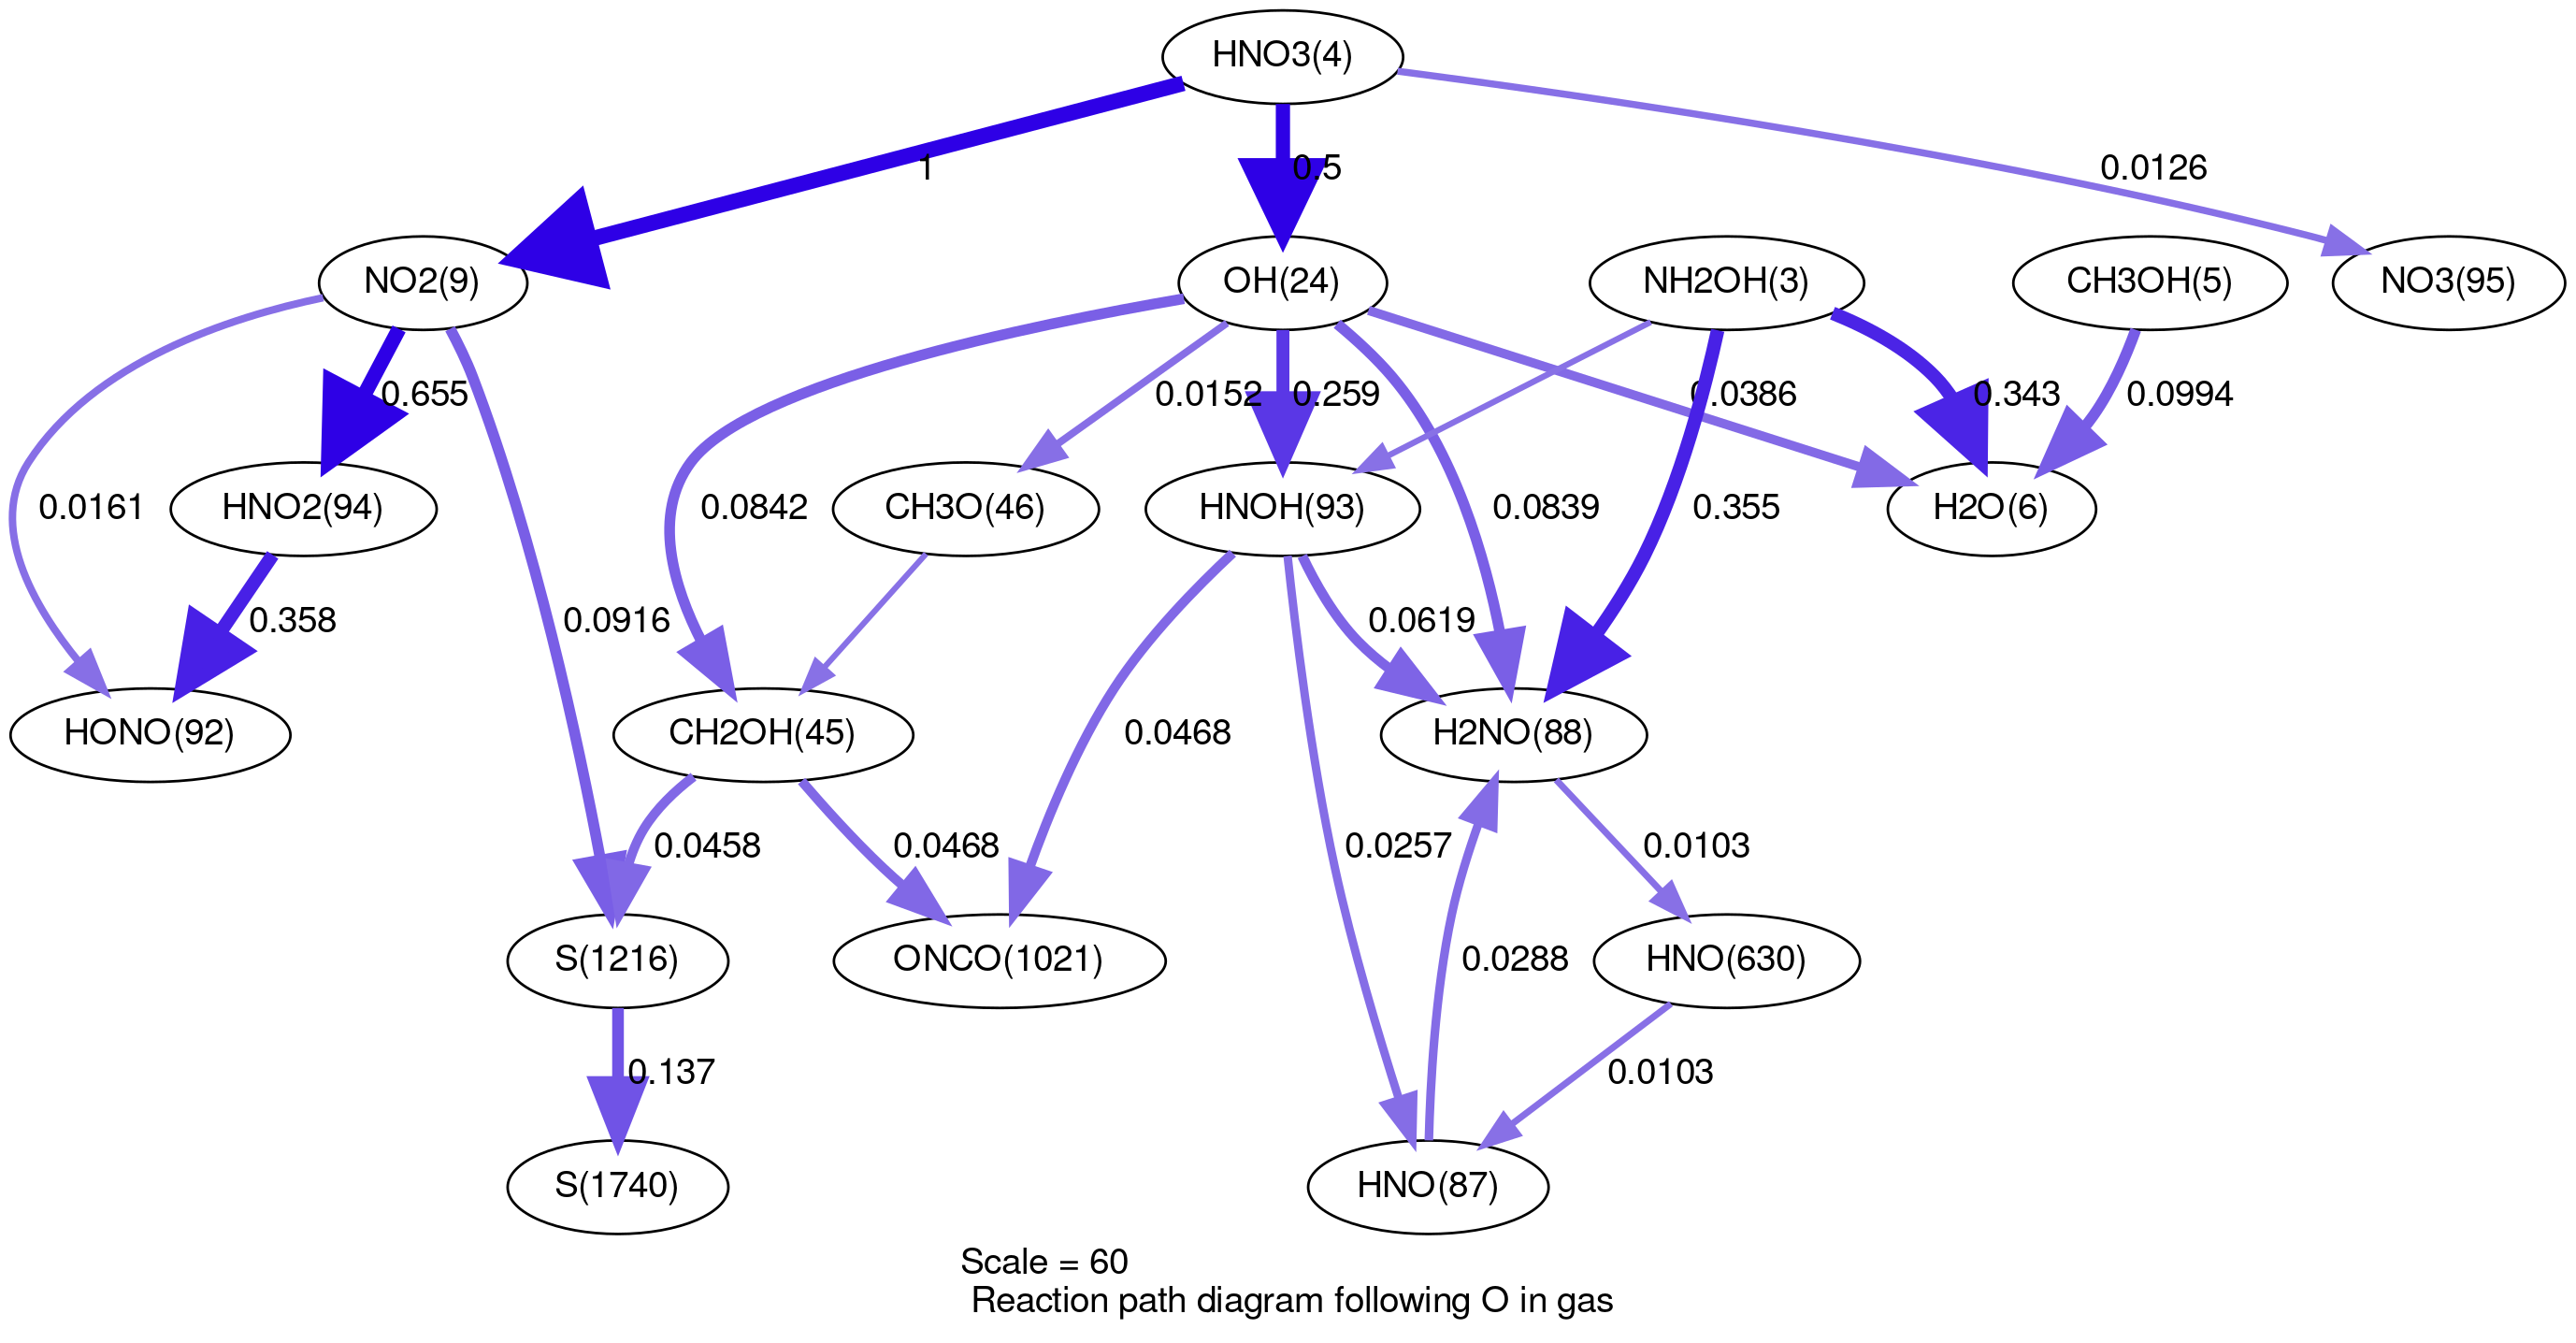

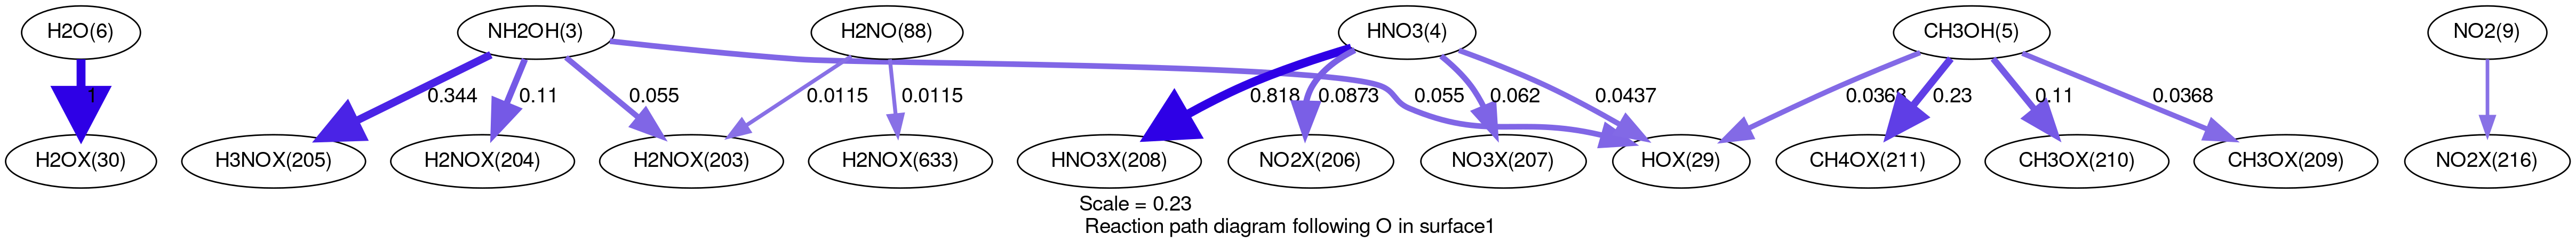

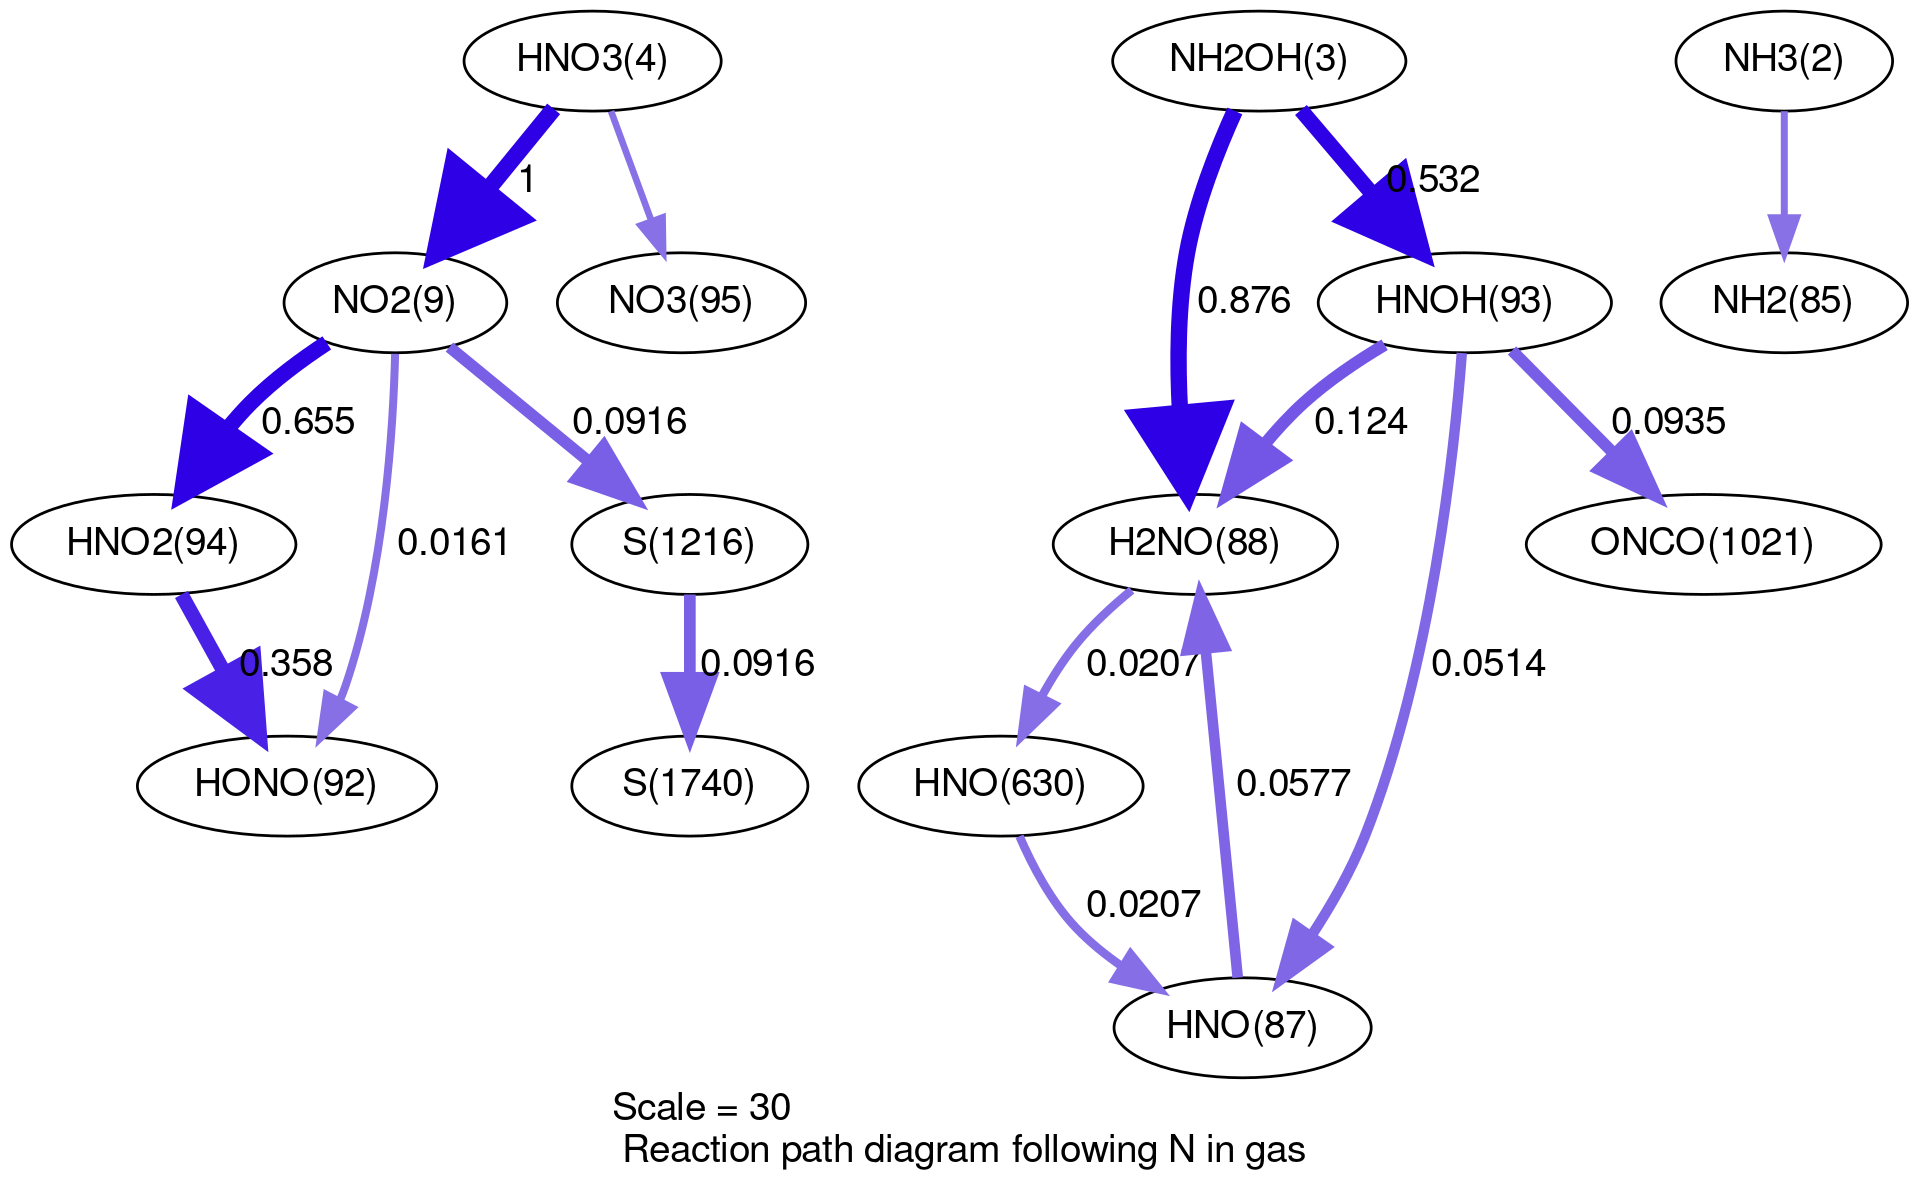

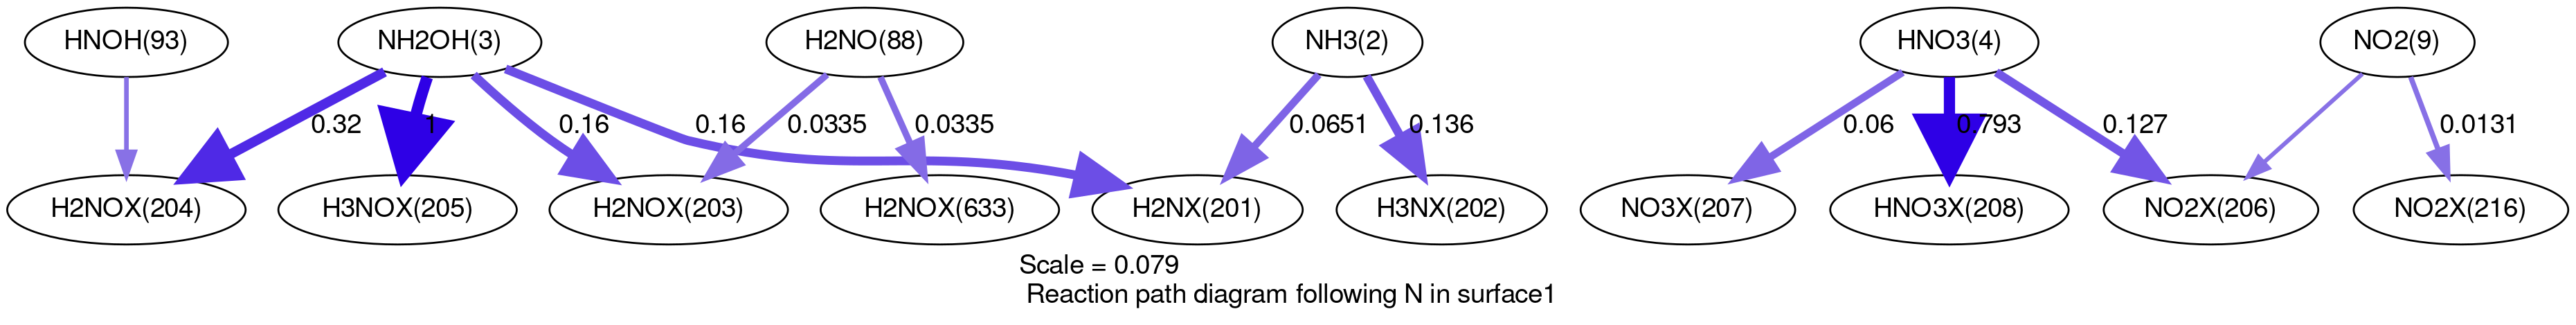

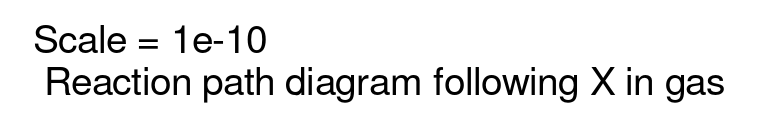

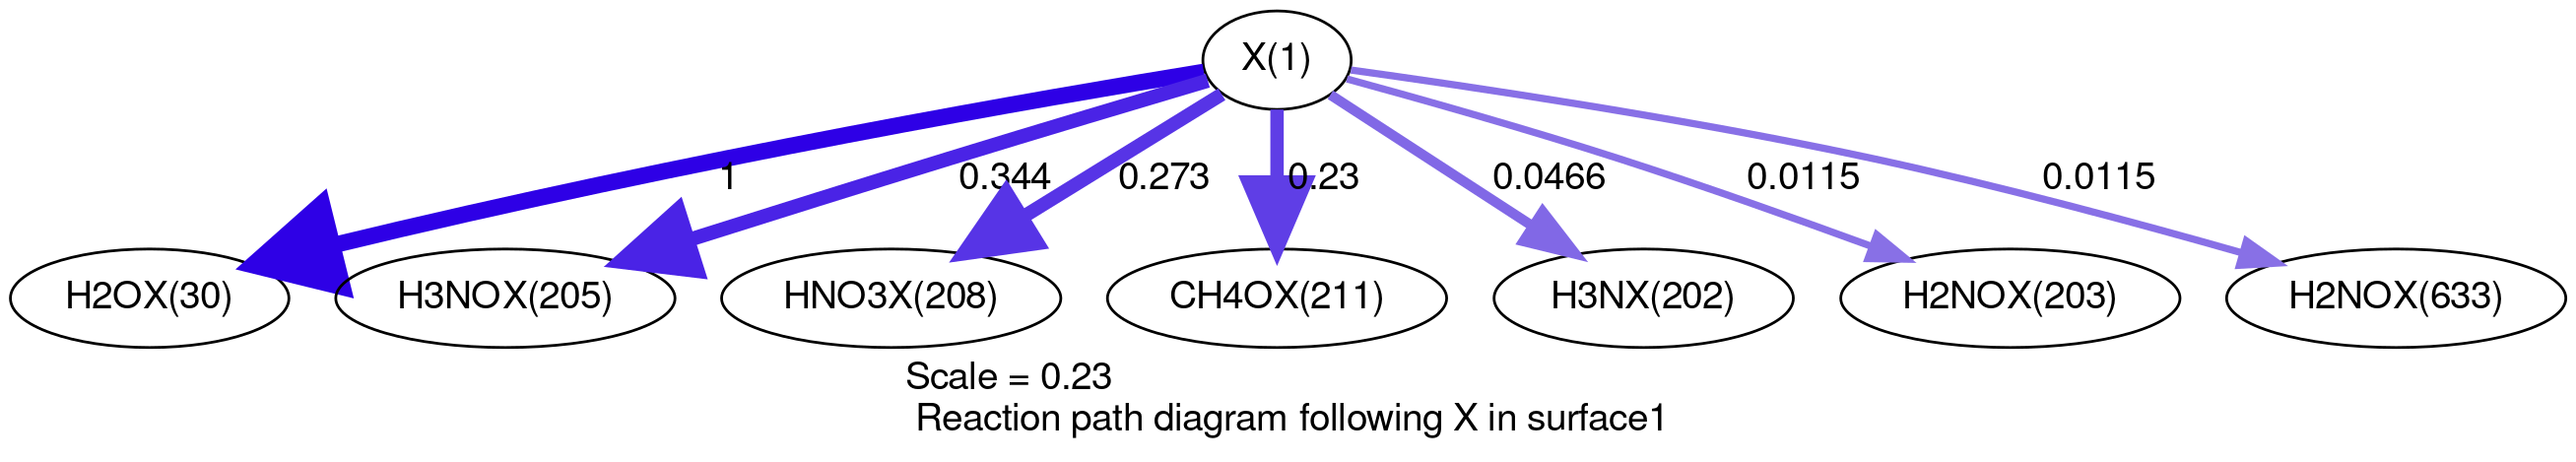

      1.000000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.050000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.100000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.150000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.200000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.250000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.300000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.350000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.400000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.450000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.500000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.550000    699.7    0.030932    0.317691    0.348102   0.209355  1.0e+00
      1.600000    699.7    0.030932    0

KeyboardInterrupt: 

In [31]:
# The plug flow reactor is represented by a linear chain of zero-dimensional
# reactors. The gas at the inlet to the first one has the specified inlet
# composition, and for all others the inlet composition is fixed at the
# composition of the reactor immediately upstream. Since in a PFR model there
# is no diffusion, the upstream reactors are not affected by any downstream
# reactors, and therefore the problem may be solved by simply marching from
# the first to last reactor, integrating each one to steady state.

TDY = gas.TDY
cov = surf.coverages

# create a new reactor
gas.TDY = TDY
r = ct.IdealGasReactor(gas, energy='on')
r.volume = r_vol

# create a reservoir to represent the reactor immediately upstream. Note
# that the gas object is set already to the state of the upstream reactor
upstream = ct.Reservoir(gas, name='upstream')

# create a reservoir for the reactor to exhaust into. The composition of
# this reservoir is irrelevant.
downstream = ct.Reservoir(gas, name='downstream')

# Add the reacting surface to the reactor. The area is set to the desired
# catalyst area in the reactor.
rsurf = ct.ReactorSurface(surf, r, A=cat_area)

# The mass flow rate into the reactor will be fixed by using a
# MassFlowController object.
m = ct.MassFlowController(upstream, r, mdot=mass_flow_rate)

# We need an outlet to the downstream reservoir. This will determine the
# pressure in the reactor. The value of K will only affect the transient
# pressure difference.
v = ct.PressureController(r, downstream, master=m, K=1e-5)

sim = ct.ReactorNet([r])
sim.max_err_test_fails = 24

# set relative and absolute tolerances on the simulation
sim.rtol = rtol
sim.atol = atol

sim.verbose = False

# surf.set_multiplier(0.)  # turn off surface reactions
# surf.set_multiplier(1e6)  # make surface reactions a million times faster

r.volume = r_vol
rsurf.area = cat_area

integration_flux_data = defaultdict(float)

outfile = open(output_filename,'w')
writer = csv.writer(outfile)
writer.writerow(['Distance (mm)', 'T (C)', 'P (atm)'] +
                gas.species_names + surf.species_names + ['gas_heat','surface_heat','alpha'])

print('    distance(mm)     T (C)    NH3(2)   NH2OH(3)     HNO3(4)    CH3OH(5)  alpha')
for n in range(NReactors):
    """
    if n == 0: # first coulpe of reactors are tiny
        surf.set_multiplier(0.)
        r.volume = r_vol * 1e-2
        rsurf.area = cat_area * 1e-2
    if n == 3:
        r.volume = r_vol
        rsurf.area = cat_area"""
        
    if n == 0: # start off with inert packing, no surface reactions
        surf.set_multiplier(0.)
    if n == int(0.001 * NReactors / length): # after 1 mm, catalyst
        surf.set_multiplier(1)
        
        fix_rates(surf, 1e22)
        save_flux_diagrams(gas, surf, suffix='1mm')
        show_flux_diagrams(gas, surf, suffix='1mm', embed=True)
    
    # Set the state of the reservoir to match that of the previous reactor
    gas.TDY = TDY = r.thermo.TDY
    cov = surf.coverages
    upstream.syncState()
    sim.reinitialize()
    try:
#       the default is residual_threshold = sim.rtol*10
        sim.advance_to_steady_state(residual_threshold = residual_threshold)

    except ct.CanteraError:
        t = sim.time
        sim.set_initial_time(0)
        gas.TDY = TDY
        surf.coverages = cov
        r.syncState()
        sim.reinitialize()
        new_target_time = 0.01 * t
        print(f"Couldn't reach {t:.1g} s so going to try {new_target_time:.1g} s")
        #save_flux_diagrams(gas, surf)
        #show_flux_diagrams(gas, surf, embed=True)
        report_rates()
        report_rate_constants()
        try:
            sim.advance(new_target_time)
        except ct.CanteraError:
            outfile.close()
            raise()
            #report_rate_constants()
 
    dist = n * r_len * 1.0e3   # distance in mm
        
    gas_heat = np.dot(gas.net_rates_of_progress, gas.delta_enthalpy) # heat evolved by gas phase reaction
    surface_heat = cat_area_per_vol * np.dot(surf.net_rates_of_progress, surf.delta_enthalpy) # heat evolved by surf phase reaction 
    alpha = surface_heat / (surface_heat + gas_heat) # fraction of heat release that is on surface.

    if not n % 10:
        print('    {:10f}  {:7.1f}  {:10f}  {:10f}  {:10f} {:10f}  {:5.1e}'.format(dist, r.T-273.15, *gas['NH3(2)','NH2OH(3)','HNO3(4)','CH3OH(5)'].X, alpha ))

    # write the gas mole fractions and surface coverages vs. distance
    writer.writerow([dist, r.T - 273.15, r.thermo.P/ct.one_atm] +
                    list(gas.X) + list(surf.coverages) + [gas_heat, surface_heat, alpha])
    

outfile.close()
print("Results saved to '{0}'".format(output_filename))

with open("integration_flux_data.txt",'w') as f:
    for (sp1,sp2),flux in integration_flux_data.items():
        f.write("{} {} {}\n".format(sp1,sp2,flux))
            

In [32]:
surf()


  surface1:

       temperature         972.814  K
          pressure          101325  Pa
           density     4.84391e-06  kg/m^3
  mean mol. weight         195.083  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy          2.0799            405.8     J
   internal energy          2.0799            405.8     J
           entropy       0.0047943           0.9353     J/K
    Gibbs function         -2.5841           -504.1     J
 heat capacity c_p        -0.01181           -2.304     J/K
 heat capacity c_v        -0.01181           -2.304     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
              X(1)              1                1     -6.23234e-05
            HX(26)    2.57867e-12        2.592e-12         -34.7491
          CH3X(28)    2.64934e-13      2.85353e-13         -45.2778
           HOX(29)     

In [33]:
sim.time

2.721429736334964e-06

In [34]:
gas.TDY = TDY
r.syncState()
r.thermo.T

972.8140182078336

In [35]:
r.thermo.X - gas.X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
report_rate_constants()


Highest forward rate constants, gas
596 : HCO(22) + NO2(9) <=> CHNO3(372)                    1.1e+14
382 : HCO(22) + NO(10) <=> CHNO2(397)                    1.1e+14
474 : HCO(22) + HNOH(93) <=> ONCDO(266)                  1.1e+14
479 : HCO(22) + HNO(630) <=> S(665)                      1.1e+14
296 : CH2OH(45) + NO(10) <=> S(1494)                     1.1e+14
437 : CH2OH(45) + HNOH(93) <=> ONCO(1021)                1.1e+14
241 : CH2OH(45) + NO2(9) <=> S(1216)                     1.1e+14

Highest forward rate constants, surface
467 : CH2X(34) + HX(26) <=> CH3X(28) + X(1)              3.1e+21
 94 : CHX(35) + X(1) <=> CX(33) + HX(26)                 1.5e+21
141 : SX(1039) + X(1) <=> HX(26) + SX(1047)              3.7e+20
745 : SX(1043) + X(1) <=> HX(26) + SX(1050)              3.7e+20
358 : SX(1064) + X(1) <=> H2NX(201) + SX(1000)           1.2e+20
683 : SX(4937) + X(1) <=> H2NOX(204) + OCX(32)           1.2e+20
134 : SX(1039) + X(1) <=> CHX(35) + H2NX(201)            1.2e+20

Highest rev

In [37]:
sim.verbose

False

<BarContainer object of 1793 artists>

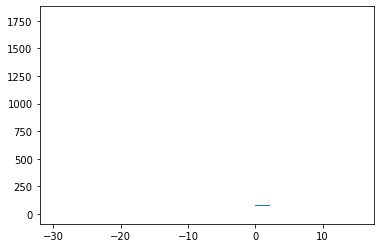

In [38]:
plt.barh(np.arange(len(gas.net_rates_of_progress)),gas.net_rates_of_progress)

In [39]:
gas.T

972.8140182078336

In [40]:
data = pd.read_csv(output_filename)
data

,Distance (mm),T (C),P (atm),Ne,NH3(2),NH2OH(3),HNO3(4),CH3OH(5),H2O(6),N2(7),...,SX(4937),SX(5513),SX(5810),SX(5814),SX(6977),SX(7604),SX(9643),gas_heat,surface_heat,alpha
0,0.000,699.665840,1.0,0.0,0.030932,0.317702,0.348111,0.209358,0.090959,7.133582e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.721700e+08,0.000000e+00,0.000000
1,0.005,699.665840,1.0,0.0,0.030932,0.317702,0.348111,0.209358,0.090959,7.133585e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.721669e+08,0.000000e+00,0.000000
2,0.010,699.665840,1.0,0.0,0.030932,0.317702,0.348111,0.209358,0.090959,7.133588e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.721633e+08,0.000000e+00,0.000000
3,0.015,699.665840,1.0,0.0,0.030932,0.317702,0.348111,0.209358,0.090959,7.133592e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.721591e+08,0.000000e+00,0.000000
4,0.020,699.665839,1.0,0.0,0.030932,0.317702,0.348111,0.209358,0.090959,7.133597e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.721541e+08,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.965,699.664018,1.0,0.0,0.030932,0.317691,0.348102,0.209355,0.090965,7.176268e-10,...,1.146675e-20,1.242644e-49,1.130359e-62,2.163056e-43,3.617464e-116,8.382791e-81,3.961773e-112,6.344226e+08,-9.127818e+13,1.000007
394,1.970,699.664018,1.0,0.0,0.030932,0.317691,0.348102,0.209355,0.090965,7.176268e-10,...,1.151477e-20,1.263579e-49,1.154212e-62,2.179367e-43,3.771876e-116,8.631442e-81,4.130676e-112,6.344226e+08,-9.127818e+13,1.000007
395,1.975,699.664018,1.0,0.0,0.030932,0.317691,0.348102,0.209355,0.090965,7.176268e-10,...,1.156281e-20,1.284788e-49,1.178476e-62,2.195733e-43,3.932269e-116,8.886502e-81,4.306112e-112,6.344226e+08,-9.127818e+13,1.000007
396,1.980,699.664018,1.0,0.0,0.030932,0.317691,0.348102,0.209355,0.090965,7.176268e-10,...,1.161087e-20,1.306272e-49,1.203157e-62,2.212154e-43,4.098854e-116,9.148116e-81,4.488311e-112,6.344226e+08,-9.127818e+13,1.000007


In [41]:
def xlabels():
    ticks = []
    labels = []
    mm = 0
    while mm < length*1000:
        ticks.append( int(NReactors * mm * 0.001 / length ) )
        labels.append( str(mm) )
        mm += 1
    labels[-1] = labels[-1] + ' mm'
    plt.xticks(ticks, labels)
    plt.xlabel("Distance down reactor")

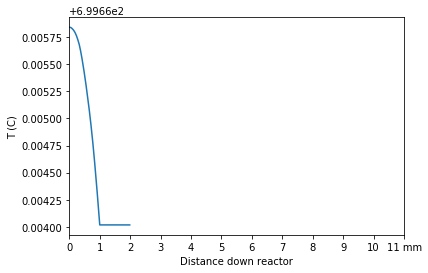

In [42]:
data['T (C)'].plot()
plt.ylabel('T (C)')
xlabels()

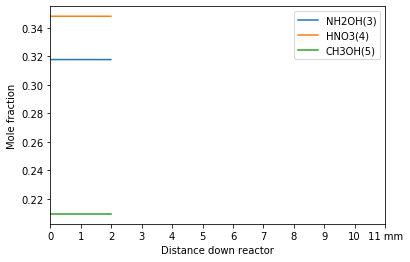

In [43]:
data[['NH2OH(3)', 'HNO3(4)', 'CH3OH(5)']].plot()
plt.ylabel('Mole fraction')
xlabels()

In [44]:
list(data.columns)[:4]

['Distance (mm)', 'T (C)', 'P (atm)', 'Ne']

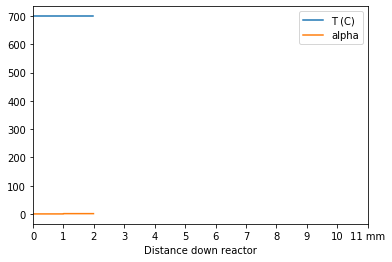

In [45]:
data[['T (C)', 'alpha']].plot()
xlabels()

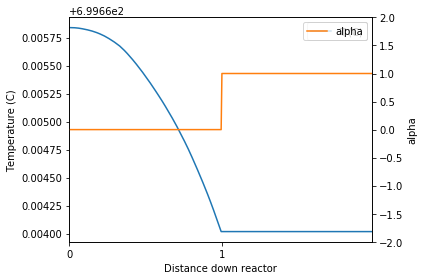

In [46]:
ax1 = data['T (C)'].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.legend()
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, color='tab:orange')
ax2.set_ylim(-2, 2)
plt.legend()
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('temperature-and-alpha.pdf')
plt.show()

In [47]:
data.columns

Index(['Distance (mm)', 'T (C)', 'P (atm)', 'Ne', 'NH3(2)', 'NH2OH(3)',
       'HNO3(4)', 'CH3OH(5)', 'H2O(6)', 'N2(7)',
       ...
       'SX(4937)', 'SX(5513)', 'SX(5810)', 'SX(5814)', 'SX(6977)', 'SX(7604)',
       'SX(9643)', 'gas_heat', 'surface_heat', 'alpha'],
      dtype='object', length=272)

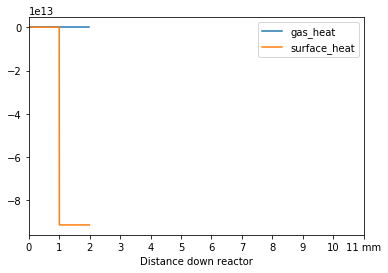

In [48]:
data[['gas_heat','surface_heat']].plot()
#plt.ylim(-1e7, 1e7)
xlabels()
plt.savefig('gas_and_surface_heat.pdf')
plt.show()


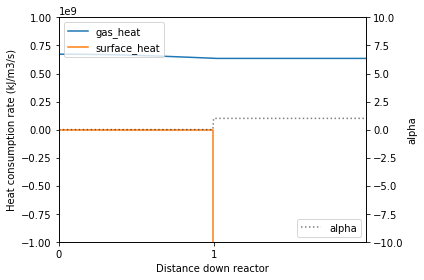

In [49]:
ax1 = data[['gas_heat','surface_heat']].plot()
plt.ylim(-1e9, 1e9)
xlabels()
plt.ylabel('Heat consumption rate (kJ/m3/s)')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, style='k:', alpha=0.5)
ax2.set_ylim(-10, 10)
plt.legend(loc='lower right')
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('heats-and-alpha.pdf')
plt.show()

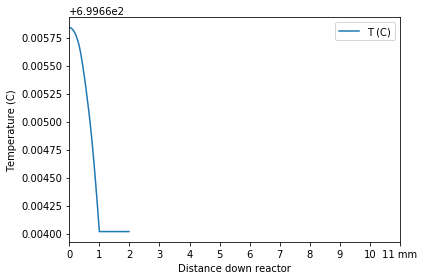

In [50]:
data[['T (C)']].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.tight_layout()
plt.savefig('temperature.pdf')
plt.show()

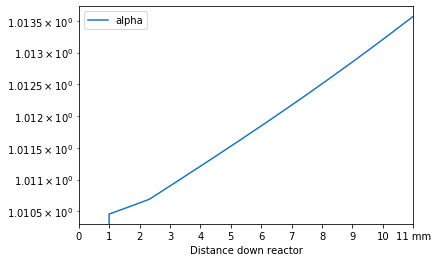

In [41]:
data[['alpha']].plot(logy=True)
xlabels()

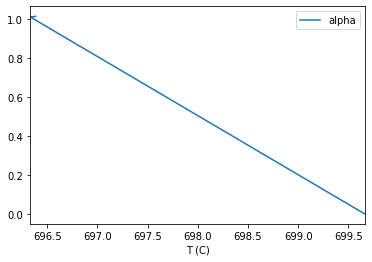

In [42]:
data.plot(x='T (C)',y='alpha')


In [43]:
specs = list(data.columns)
specs = specs[4:-3]
excluded = [s for s in data.columns if s not in specs]
gas_species = [s for s in specs if 'X' not in s ]
adsorbates = [s for s in specs if 'X' in s]

excluded, gas_species, adsorbates

(['Distance (mm)',
  'T (C)',
  'P (atm)',
  'Ne',
  'gas_heat',
  'surface_heat',
  'alpha'],
 ['NH3(2)',
  'NH2OH(3)',
  'HNO3(4)',
  'CH3OH(5)',
  'H2O(6)',
  'N2(7)',
  'O2(8)',
  'NO2(9)',
  'NO(10)',
  'N2O(11)',
  'CO2(12)',
  'H2(13)',
  'CO(14)',
  'CH4(15)',
  'C2H6(16)',
  'CH2O(17)',
  'CH3(18)',
  'C3H8(19)',
  'H(20)',
  'C2H5(21)',
  'HCO(22)',
  'CH3CHO(23)',
  'OH(24)',
  'C2H4(25)',
  'O(36)',
  'Ar(37)',
  'HO2(39)',
  'H2O2(40)',
  'HOCO(41)',
  'CH2(42)',
  'CH2(S)(43)',
  'CH(44)',
  'CH2OH(45)',
  'CH3O(46)',
  'HCOH(47)',
  'CH3OO(48)',
  'CH2CO(49)',
  'C2H3(50)',
  'C(51)',
  'C2H2(52)',
  'C2H(53)',
  'CH3OOH(54)',
  'CH2OOH(55)',
  'HOCH2O(56)',
  'HOCHO(57)',
  'C2H5O(58)',
  'C2H5O2(59)',
  'C2H5O2(60)',
  'cC2H4O(61)',
  'CH2CHO(62)',
  'H2CC(63)',
  'CH3CO(64)',
  'C2H4O(65)',
  'C2H5O(66)',
  'C2H3O2(67)',
  'CHCHO(68)',
  'OCHCHO(69)',
  'HCCO(70)',
  'HCCOH(71)',
  'CHCHOH(72)',
  'C2(73)',
  'C2O(74)',
  'C2H6O(75)',
  'C2H5O(76)',
  'C2H5O3(77)',
  

/Users/rwest/anaconda/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


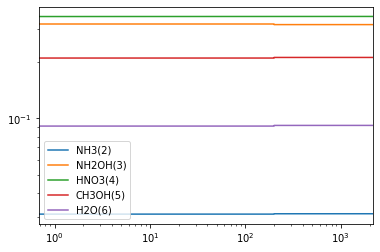

In [44]:
data[gas_species[0:5]].plot(logy=True, logx=True)

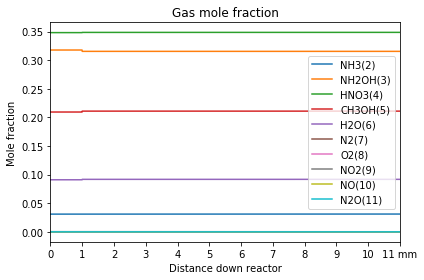

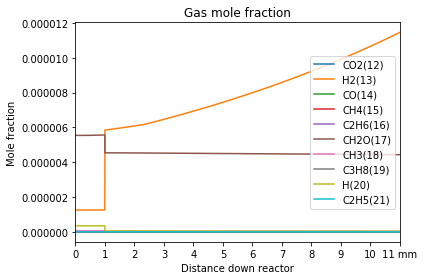

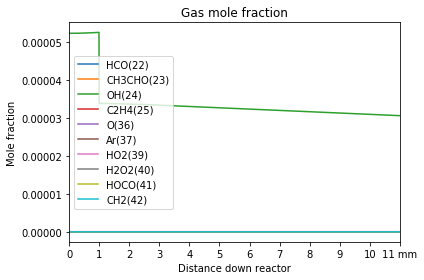

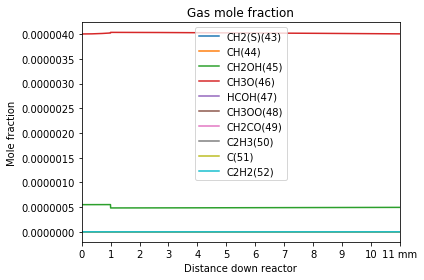

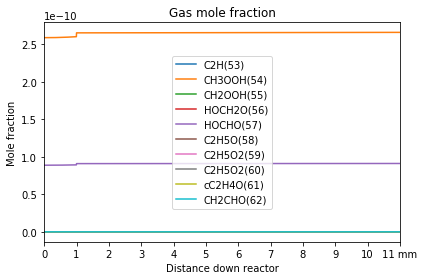

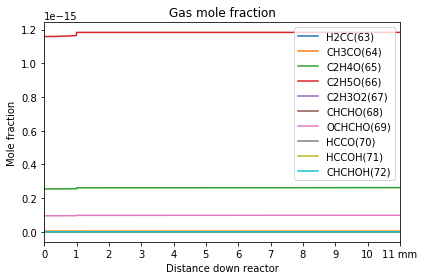

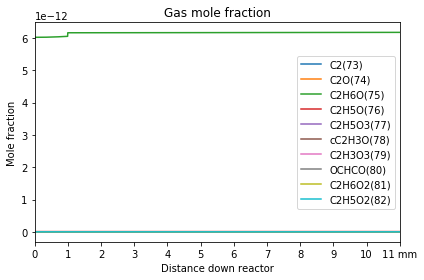

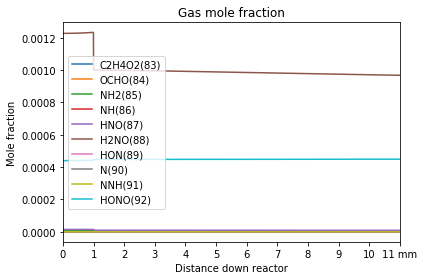

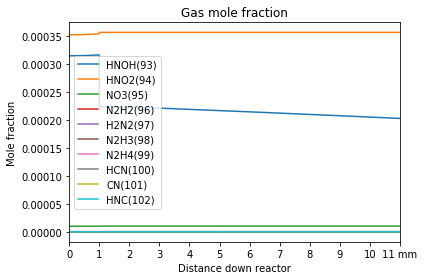

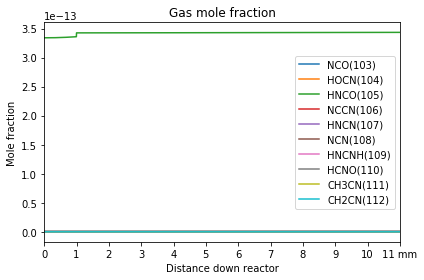

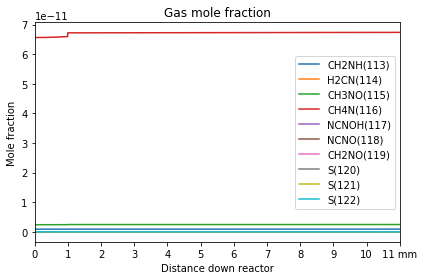

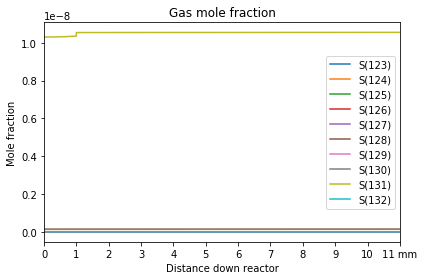

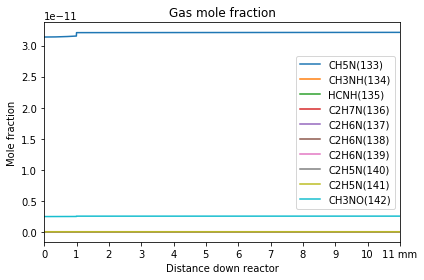

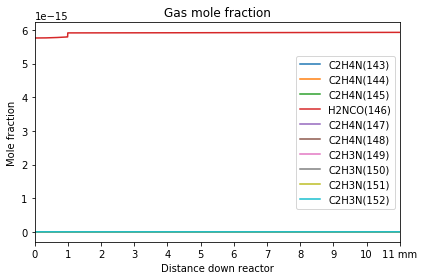

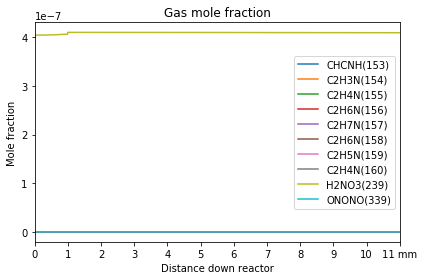

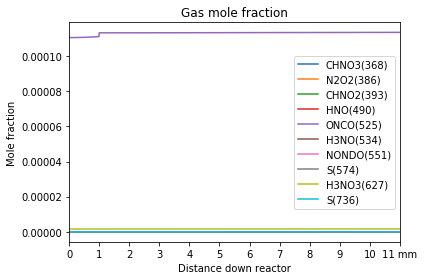

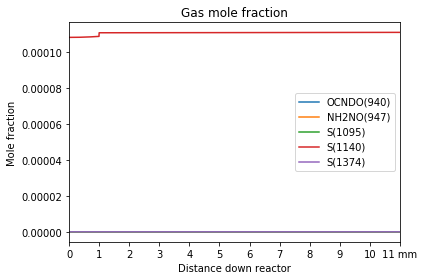

In [45]:
for i in range(0,len(gas_species),10):
    data[gas_species[i:i+10]].plot(title='Gas mole fraction', logy=False)
    xlabels()
    plt.ylabel('Mole fraction')
    plt.tight_layout()
    plt.savefig(f'gas_mole_fractions_{i}.pdf')
    plt.show()
    


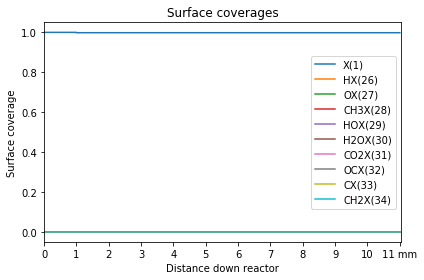

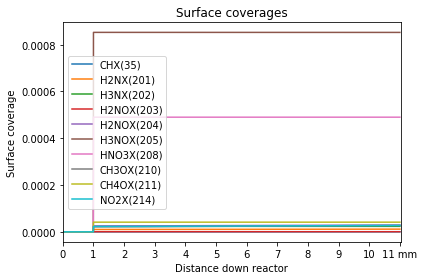

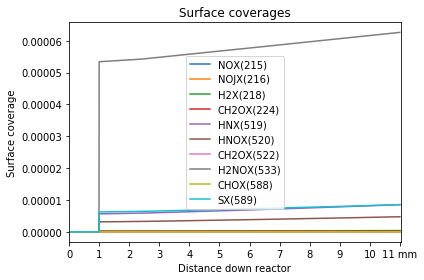

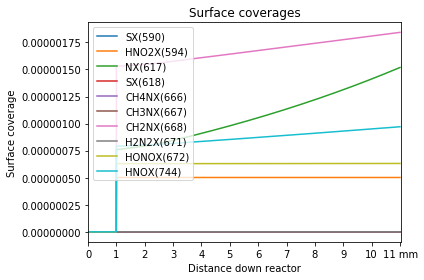

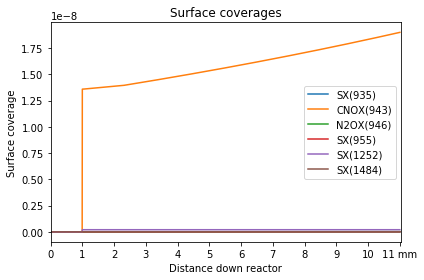

In [46]:
for i in range(0,len(adsorbates),10):
    data[adsorbates[i:i+10]].plot(title='Surface coverages', logy=False)
    xlabels()
    plt.xlim(0,len(data)+5)
    plt.ylabel('Surface coverage')
    plt.tight_layout()
    plt.savefig(f'surface_coverages_{i}.pdf')
    plt.show()

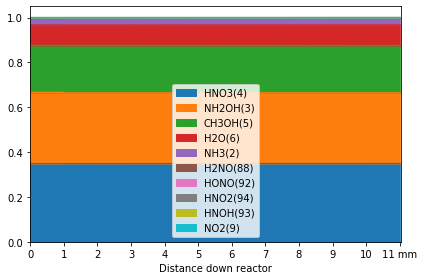

In [47]:
main_gas_species = data[gas_species].max().sort_values(ascending=False)[:10].keys()
data[main_gas_species].plot.area()

xlabels()
plt.xlim(0,len(data)+5)
plt.tight_layout()
plt.savefig(f'gas_mole_fractions_top10.pdf')
plt.show()

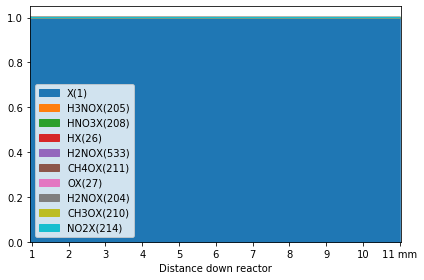

In [48]:
main_adsorbates = data[adsorbates].max().sort_values(ascending=False)[:10].keys()
data[main_adsorbates].plot.area()

xlabels()
plt.xlim(190,len(data)+5)
plt.tight_layout()
plt.savefig(f'surface_coverages_top10.pdf')
plt.show()
    

In [49]:
for a in main_adsorbates:
    s = surf.species(a)
    print(s, s.composition)

<Species X(1)> {'X': 1.0}
<Species H3NOX(205)> {'H': 3.0, 'N': 1.0, 'O': 1.0, 'X': 1.0}
<Species HNO3X(208)> {'H': 1.0, 'N': 1.0, 'O': 3.0, 'X': 1.0}
<Species HX(26)> {'H': 1.0, 'X': 1.0}
<Species H2NOX(533)> {'H': 2.0, 'N': 1.0, 'O': 1.0, 'X': 1.0}
<Species CH4OX(211)> {'C': 1.0, 'H': 4.0, 'O': 1.0, 'X': 1.0}
<Species OX(27)> {'O': 1.0, 'X': 1.0}
<Species H2NOX(204)> {'H': 2.0, 'N': 1.0, 'O': 1.0, 'X': 1.0}
<Species CH3OX(210)> {'C': 1.0, 'H': 3.0, 'O': 1.0, 'X': 1.0}
<Species NO2X(214)> {'N': 1.0, 'O': 2.0, 'X': 1.0}


In [50]:
surf.coverages

array([9.98201699e-01, 1.46198069e-04, 3.53413304e-05, 6.88720043e-09,
       2.41663732e-08, 2.27241747e-05, 8.05075022e-17, 3.21878309e-09,
       1.80050274e-07, 5.80351454e-12, 1.35200763e-08, 1.15234869e-05,
       2.33718455e-05, 4.61523249e-07, 2.90983893e-05, 8.52613103e-04,
       4.90194648e-04, 2.73156186e-05, 4.12941758e-05, 2.72974893e-05,
       7.03581502e-08, 4.35515269e-13, 3.97552707e-07, 2.13508585e-07,
       8.53668975e-06, 4.74146273e-06, 4.17759500e-15, 6.26503322e-05,
       8.17116068e-09, 8.53587541e-06, 1.96804461e-11, 5.02070214e-07,
       1.51842268e-06, 7.14926966e-11, 1.16451244e-15, 2.65013662e-12,
       1.84300788e-06, 3.73235030e-13, 6.31754471e-07, 9.70952891e-07,
       1.08156882e-12, 1.89982704e-08, 1.75883781e-11, 6.55664507e-12,
       2.02038251e-10, 1.08834996e-11])

In [51]:
surf.set_multiplier(1)
diagram = ct.ReactionPathDiagram(surf, 'X')
diagram.get_data()

'\nX(1) H2OX(30) H3NOX(205) HNO3X(208) CH4OX(211) H3NX(202) HX(26) HOX(29) OX(27) H2NOX(204) CH3OX(210) CH2X(34) CHX(35) CX(33) SX(589) HNOX(520) NX(617) H2X(218) H2NOX(203) H2NX(201) H2NOX(533) HONOX(672) HNO2X(594) HNX(519) HNOX(744) NOX(215) SX(618) SX(955) CNOX(943) NO2X(214) SX(590) CH3NX(667) NOJX(216) N2OX(946) CH2OX(522) CHOX(588) CH2NX(668) SX(935) CH2OX(224) SX(1252) CH4NX(666) CH3X(28) H2N2X(671) SX(1484) OCX(32) CO2X(31) \nX(1) H2OX(30) 0.230321 -0.230321\nX(1) H3NOX(205) 0.0779785 -0.07798\nX(1) HNO3X(208) 0.0623977 -0.062397\nX(1) CH4OX(211) 0.052949 -0.0529491\nX(1) H3NX(202) 0.0107006 -0.0107006\nX(1) HX(26) 0.0318326 -0.0212057\nX(1) HOX(29) 9.74477e-05 -5.78326e-08\nX(1) OX(27) 3.31185e-10 -1.45155e-08\nX(1) H2NOX(204) 5.09771e-05 -2.29457e-06\nX(1) CH3OX(210) 1.26274e-07 -1.74275e-11\nX(1) CH2X(34) 2.5164e-11 -1.27743e-08\nX(1) CHX(35) 1.99536e-07 -2.92125e-07\nX(1) CX(33) 0.000202235 -15.9161\nX(1) SX(589) 0 -0\nX(1) HNOX(520) 0 -0\nX(1) NX(617) 0 -0\nX(1) H2X(218) 